# Car Accidents Classification Project

## Data Preprocessing

#### Load Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

In [2]:
data = pd.read_csv('accidents.csv')
data

,pk_teuna_fikt,sug_tik,THUM_GEOGRAFI,SUG_DEREH,SEMEL_YISHUV,REHOV1,REHOV2,BAYIT,ZOMET_IRONI,KVISH1,...,MEKOM_HAZIYA,KIVUN_HAZIYA,MAHOZ,NAFA,EZOR_TIVI,MAAMAD_MINIZIPALI,ZURAT_ISHUV,STATUS_IGUN,X,Y
0,2023000009,1,1,2,8600,719.0,NaN,104.0,NaN,NaN,...,0,9,5,51,512,0.0,14,1,183206.0,666306.0
1,2023000011,1,1,2,9700,NaN,NaN,9999.0,NaN,NaN,...,0,9,4,42,421,0.0,15,2,190185.0,673239.0
2,2023000013,1,1,2,8300,120.0,NaN,9999.0,NaN,NaN,...,0,9,4,44,442,0.0,13,3,179498.0,653490.0
3,2023000014,1,1,3,0,NaN,NaN,NaN,NaN,4.0,...,0,9,3,31,311,99.0,99,1,209195.0,751807.0
4,2023000021,1,1,2,3000,4121.0,NaN,9999.0,NaN,NaN,...,0,9,1,11,111,0.0,12,2,223381.0,633927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,2023099950,1,1,2,3000,4763.0,NaN,2.0,NaN,NaN,...,0,9,1,11,111,0.0,12,3,221256.0,637964.0
8828,2023099951,1,1,2,5000,116.0,NaN,93.0,NaN,NaN,...,0,9,5,51,511,0.0,13,1,181474.0,669710.0
8829,2023099957,1,1,1,6600,751.0,736.0,NaN,11100356.0,NaN,...,3,9,5,51,513,0.0,14,1,178893.0,657953.0
8830,2023099981,1,1,4,0,NaN,NaN,NaN,NaN,4.0,...,0,9,5,51,512,99.0,99,1,185389.0,664592.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pk_teuna_fikt      8832 non-null   int64  
 1   sug_tik            8832 non-null   int64  
 2   THUM_GEOGRAFI      8832 non-null   int64  
 3   SUG_DEREH          8832 non-null   int64  
 4   SEMEL_YISHUV       8832 non-null   int64  
 5   REHOV1             5367 non-null   float64
 6   REHOV2             2684 non-null   float64
 7   BAYIT              2989 non-null   float64
 8   ZOMET_IRONI        2684 non-null   float64
 9   KVISH1             3081 non-null   float64
 10  KVISH2             3021 non-null   float64
 11  KM                 3066 non-null   float64
 12  ZOMET_LO_IRONI     1304 non-null   float64
 13  YEHIDA             8832 non-null   int64  
 14  SHNAT_TEUNA        8832 non-null   int64  
 15  HODESH_TEUNA       8832 non-null   int64  
 16  SHAA               8832 

#### Import Key Table and merge for values of each code column

In [4]:
keys = pd.read_csv('Key Table.csv')
keys.rename(columns={'קוד': 'code'}, inplace=True)
keys.rename(columns={'מאפיינים': 'value'}, inplace=True)
keys

,מקור,value,code,טיפוס,שם משתנה,שם שדה,עד,-מ
0,NaN,"ת""ד מורחב",1.0,N10\nN8,PK_TEUNA_FIKT\nSUG_TIK,מספר תאונה פיקטיבי\nסוג תיק,10\n18,1\n11
1,NaN,ישראל ללא\nיהודה ושומרון,1.0,N8,THUM_GEOGRAFI,תחום גאוגרפי,26,19
2,NaN,יהודה והשומרון,2.0,NaN,THUM_GEOGRAFI,NaN,NaN,NaN
3,NaN,עירוני בצומת,1.0,N8,SUG_DEREH,סוג דרך,34,27
4,NaN,עירוני לא בצומת,2.0,NaN,SUG_DEREH,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
191,NaN,מרכז דרך,3.0,NaN,IGUN_MEKUBAZ,NaN,NaN,NaN
192,NaN,מרכז קילומטר,4.0,NaN,IGUN_MEKUBAZ,NaN,NaN,NaN
193,NaN,לא עוגן,9.0,NaN,IGUN_MEKUBAZ,NaN,NaN,NaN
194,NaN,NaN,NaN,N6,X_KORDINAT,קוארדינטה X,365,360


In [5]:
# Step 1: Pivot the first table so that "שם משתנה" becomes columns

df1_piv = data.melt(id_vars=['pk_teuna_fikt'], var_name='שם משתנה', value_name='code')
df1_piv


,pk_teuna_fikt,שם משתנה,code
0,2023000009,sug_tik,1.0
1,2023000011,sug_tik,1.0
2,2023000013,sug_tik,1.0
3,2023000014,sug_tik,1.0
4,2023000021,sug_tik,1.0
...,...,...,...
388603,2023099950,Y,637964.0
388604,2023099951,Y,669710.0
388605,2023099957,Y,657953.0
388606,2023099981,Y,664592.0


In [6]:
# merge tables
key_columns = ['code','שם משתנה']
value_column = 'value'  
merged_table = df1_piv.merge(keys[key_columns + [value_column]], on=key_columns, how='left')

In [7]:
merged_table[merged_table["שם משתנה"]=="SUG_TEUNA"]

,pk_teuna_fikt,שם משתנה,code,value
176640,2023000009,SUG_TEUNA,3.0,התנגשות חזית\nבאחור
176641,2023000011,SUG_TEUNA,1.0,פגיעה בהולך רגל
176642,2023000013,SUG_TEUNA,3.0,התנגשות חזית\nבאחור
176643,2023000014,SUG_TEUNA,2.0,התנגשות חזית\nאל צד
176644,2023000021,SUG_TEUNA,3.0,התנגשות חזית\nבאחור
...,...,...,...,...
185467,2023099950,SUG_TEUNA,2.0,התנגשות חזית\nאל צד
185468,2023099951,SUG_TEUNA,3.0,התנגשות חזית\nבאחור
185469,2023099957,SUG_TEUNA,1.0,פגיעה בהולך רגל
185470,2023099981,SUG_TEUNA,8.0,התנגשות עם עצם דומם


In [8]:
# Pivot the merged DataFrame to get "code" and "value" for each "שם משתנה"
pivot_df = merged_table.pivot_table(index=['pk_teuna_fikt'], 
                                 columns='שם משתנה', 
                                 values=['value', 'code'], 
                                 aggfunc=lambda x: ' '.join(x.astype(str)))

In [9]:
pivot_df

code                                                 \
שם משתנה        BAYIT EZOR_TIVI HAD_MASLUL HODESH_TEUNA HUMRAT_TEUNA   
pk_teuna_fikt                                                          
2023000009      104.0     512.0        3.0          4.0          3.0   
2023000011     9999.0     421.0        1.0          5.0          2.0   
2023000013     9999.0     442.0        9.0          7.0          2.0   
2023000014        nan     311.0        3.0          1.0          2.0   
2023000021     9999.0     111.0        3.0          6.0          3.0   
...               ...       ...        ...          ...          ...   
2023099950        2.0     111.0        3.0          4.0          3.0   
2023099951       93.0     511.0        0.0          7.0          3.0   
2023099957        nan     513.0        0.0          4.0          3.0   
2023099981        nan     512.0        1.0          5.0          2.0   
2023099996        nan     222.0        3.0          8.0          2.0   

                                                          ...      value       \
שם משתנה      KIVUN_HAZIYA      KM KVISH1 KVISH2 LO_HAZA  ...     TKINUT    X   
pk_teuna_fikt                                             ...                   
2023000009             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023000011             9.0     nan    nan    nan     6.0  ...  אין ליקוי  nan   
2023000013             9.0     nan    nan    nan     9.0  ...    לא ידוע  nan   
2023000014             9.0  2236.0    4.0    0.0     9.0  ...  אין ליקוי  nan   
2023000021             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
...                    ...     ...    ...    ...     ...  ...        ...  ...   
2023099950             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099951             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099957             9.0     nan    nan    nan     9.0  ...  אין ליקוי  nan   
2023099981             9.0  1170.0    4.0    0.0     9.0  ...  אין ליקוי  nan   
2023099996             9.0    61.0  807.0    0.0     9.0  ...  אין ליקוי  nan   

                                                                     \
שם משתנה         Y        YEHIDA YOM_BASHAVUA YOM_LAYLA ZOMET_IRONI   
pk_teuna_fikt                                                         
2023000009     nan      מרחב ת"א        ראשון       יום         nan   
2023000011     nan    מרחב השרון        ראשון      לילה         nan   
2023000013     nan    מרחב השפלה        רביעי       יום         nan   
2023000014     nan     מרחב גליל        חמישי       יום         nan   
2023000021     nan  מחוז ירושלים        רביעי       יום         nan   
...            ...           ...          ...       ...         ...   
2023099950     nan  מחוז ירושלים          שבת       יום         nan   
2023099951     nan      מרחב ת"א        רביעי       יום         nan   
2023099957     nan      מרחב ת"א        רביעי       יום         nan   
2023099981     nan      מרחב ת"א        שלישי      לילה         nan   
2023099996     nan     מרחב גליל        ראשון       יום         nan   

                                                  
שם משתנה      ZOMET_LO_IRONI ZURAT_ISHUV sug_tik  
pk_teuna_fikt                                     
2023000009               nan         nan     nan  
2023000011               nan         nan     nan  
2023000013               nan         nan     nan  
2023000014               nan         nan     nan  
2023000021               nan         nan     nan  
...                      ...         ...     ...  
2023099950               nan         nan     nan  
2023099951               nan         nan     nan  
2023099957               nan         nan     nan  
2023099981               nan         nan     nan  
2023099996               nan         nan     nan  

[8832 rows x 88 columns]

In [10]:
#Flatten the multi-level columns and reset index
pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)

In [11]:
pivot_df

,pk_teuna_fikt,BAYIT_code,EZOR_TIVI_code,HAD_MASLUL_code,HODESH_TEUNA_code,HUMRAT_TEUNA_code,KIVUN_HAZIYA_code,KM_code,KVISH1_code,KVISH2_code,...,TKINUT_value,X_value,Y_value,YEHIDA_value,YOM_BASHAVUA_value,YOM_LAYLA_value,ZOMET_IRONI_value,ZOMET_LO_IRONI_value,ZURAT_ISHUV_value,sug_tik_value
0,2023000009,104.0,512.0,3.0,4.0,3.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,"מרחב ת""א",ראשון,יום,nan,nan,nan,nan
1,2023000011,9999.0,421.0,1.0,5.0,2.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,מרחב השרון,ראשון,לילה,nan,nan,nan,nan
2,2023000013,9999.0,442.0,9.0,7.0,2.0,9.0,nan,nan,nan,...,לא ידוע,nan,nan,מרחב השפלה,רביעי,יום,nan,nan,nan,nan
3,2023000014,nan,311.0,3.0,1.0,2.0,9.0,2236.0,4.0,0.0,...,אין ליקוי,nan,nan,מרחב גליל,חמישי,יום,nan,nan,nan,nan
4,2023000021,9999.0,111.0,3.0,6.0,3.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,מחוז ירושלים,רביעי,יום,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,2023099950,2.0,111.0,3.0,4.0,3.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,מחוז ירושלים,שבת,יום,nan,nan,nan,nan
8828,2023099951,93.0,511.0,0.0,7.0,3.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,"מרחב ת""א",רביעי,יום,nan,nan,nan,nan
8829,2023099957,nan,513.0,0.0,4.0,3.0,9.0,nan,nan,nan,...,אין ליקוי,nan,nan,"מרחב ת""א",רביעי,יום,nan,nan,nan,nan
8830,2023099981,nan,512.0,1.0,5.0,2.0,9.0,1170.0,4.0,0.0,...,אין ליקוי,nan,nan,"מרחב ת""א",שלישי,לילה,nan,nan,nan,nan


In [12]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pk_teuna_fikt            8832 non-null   int64 
 1   BAYIT_code               8832 non-null   object
 2   EZOR_TIVI_code           8832 non-null   object
 3   HAD_MASLUL_code          8832 non-null   object
 4   HODESH_TEUNA_code        8832 non-null   object
 5   HUMRAT_TEUNA_code        8832 non-null   object
 6   KIVUN_HAZIYA_code        8832 non-null   object
 7   KM_code                  8832 non-null   object
 8   KVISH1_code              8832 non-null   object
 9   KVISH2_code              8832 non-null   object
 10  LO_HAZA_code             8832 non-null   object
 11  MAAMAD_MINIZIPALI_code   8832 non-null   object
 12  MAHOZ_code               8832 non-null   object
 13  MEHIRUT_MUTERET_code     8832 non-null   object
 14  MEKOM_HAZIYA_code        8832 non-null  

In [13]:
data = pivot_df.replace("nan",np.NaN)


C:\Users\user\AppData\Local\Temp\ipykernel_24428\4026855520.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = pivot_df.replace("nan",np.NaN)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pk_teuna_fikt            8832 non-null   int64  
 1   BAYIT_code               2989 non-null   object 
 2   EZOR_TIVI_code           8832 non-null   object 
 3   HAD_MASLUL_code          8832 non-null   object 
 4   HODESH_TEUNA_code        8832 non-null   object 
 5   HUMRAT_TEUNA_code        8832 non-null   object 
 6   KIVUN_HAZIYA_code        8832 non-null   object 
 7   KM_code                  3066 non-null   object 
 8   KVISH1_code              3081 non-null   object 
 9   KVISH2_code              3021 non-null   object 
 10  LO_HAZA_code             8832 non-null   object 
 11  MAAMAD_MINIZIPALI_code   8821 non-null   object 
 12  MAHOZ_code               8832 non-null   object 
 13  MEHIRUT_MUTERET_code     8832 non-null   object 
 14  MEKOM_HAZIYA_code       

#### For each column, let's choose "code" or value"

In [15]:
columns_to_drop = [
    'REHOV1_code', 'REHOV1_value',
    'REHOV2_code', 'REHOV2_value',
    'BAYIT_code', 'BAYIT_value',
    'ZOMET_IRONI_code', 'ZOMET_IRONI_value',
    'KVISH1_value', 'KVISH2_value',
    'KM_code', 'KM_value',
    'ZOMET_LO_IRONI_code', 'ZOMET_LO_IRONI_value',
    'YEHIDA_code',
    'SHNAT_TEUNA_value', 'HODESH_TEUNA_value', 'SHAA_value',
    'SUG_YOM_code', 'YOM_LAYLA_code',
    'SUG_TEUNA_code', 'MEHIRUT_MUTERET_value',
    'TKINUT_code', 'ROHAV_value', 'SIMUN_TIMRUR_code',
    'TEURA_code', 'MEZEG_AVIR_code', 'PNE_KVISH_code',
    'SUG_EZEM_code', 'MERHAK_EZEM_code', 'LO_HAZA_code',
    'OFEN_HAZIYA_code', 'MEKOM_HAZIYA_code', 'KIVUN_HAZIYA_code',
    'MAHOZ_value', 'NAFA_value', 'EZOR_TIVI_value',
    'MAAMAD_MINIZIPALI_value', 'ZURAT_ISHUV_value',
    'STATUS_IGUN_code', 'STATUS_IGUN_value',
    'X_value', 'Y_value'
]

data=data.drop(columns=columns_to_drop)
data

,pk_teuna_fikt,EZOR_TIVI_code,HAD_MASLUL_code,HODESH_TEUNA_code,HUMRAT_TEUNA_code,KVISH1_code,KVISH2_code,MAAMAD_MINIZIPALI_code,MAHOZ_code,MEHIRUT_MUTERET_code,...,SUG_EZEM_value,SUG_TEUNA_value,SUG_YOM_value,TEURA_value,THUM_GEOGRAFI_value,TKINUT_value,YEHIDA_value,YOM_BASHAVUA_value,YOM_LAYLA_value,sug_tik_value
0,2023000009,512.0,3.0,4.0,3.0,NaN,NaN,0.0,5.0,1.0,...,לא ידוע,התנגשות חזית\nבאחור,חול המועד,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",ראשון,יום,NaN
1,2023000011,421.0,1.0,5.0,2.0,NaN,NaN,0.0,4.0,1.0,...,לא ידוע,פגיעה בהולך רגל,יום אחר,לילה פעלה\nתאורה,ישראל ללא\nיהודה ושומרון,אין ליקוי,מרחב השרון,ראשון,לילה,NaN
2,2023000013,442.0,9.0,7.0,2.0,NaN,NaN,0.0,4.0,0.0,...,לא ידוע,התנגשות חזית\nבאחור,יום אחר,יום לא ידוע,ישראל ללא\nיהודה ושומרון,לא ידוע,מרחב השפלה,רביעי,יום,NaN
3,2023000014,311.0,3.0,1.0,2.0,4.0,0.0,99.0,3.0,2.0,...,לא ידוע,התנגשות חזית\nאל צד,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מרחב גליל,חמישי,יום,NaN
4,2023000021,111.0,3.0,6.0,3.0,NaN,NaN,0.0,1.0,1.0,...,לא ידוע,התנגשות חזית\nבאחור,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מחוז ירושלים,רביעי,יום,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,2023099950,111.0,3.0,4.0,3.0,NaN,NaN,0.0,1.0,1.0,...,לא ידוע,התנגשות חזית\nאל צד,חול המועד,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מחוז ירושלים,שבת,יום,NaN
8828,2023099951,511.0,0.0,7.0,3.0,NaN,NaN,0.0,5.0,1.0,...,לא ידוע,התנגשות חזית\nבאחור,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",רביעי,יום,NaN
8829,2023099957,513.0,0.0,4.0,3.0,NaN,NaN,0.0,5.0,1.0,...,לא ידוע,פגיעה בהולך רגל,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",רביעי,יום,NaN
8830,2023099981,512.0,1.0,5.0,2.0,4.0,0.0,99.0,5.0,6.0,...,גדר בטיחות לרכב,התנגשות עם עצם דומם,יום אחר,לילה פעלה\nתאורה,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",שלישי,לילה,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pk_teuna_fikt           8832 non-null   int64  
 1   EZOR_TIVI_code          8832 non-null   object 
 2   HAD_MASLUL_code         8832 non-null   object 
 3   HODESH_TEUNA_code       8832 non-null   object 
 4   HUMRAT_TEUNA_code       8832 non-null   object 
 5   KVISH1_code             3081 non-null   object 
 6   KVISH2_code             3021 non-null   object 
 7   MAAMAD_MINIZIPALI_code  8821 non-null   object 
 8   MAHOZ_code              8832 non-null   object 
 9   MEHIRUT_MUTERET_code    8832 non-null   object 
 10  NAFA_code               8832 non-null   object 
 11  RAV_MASLUL_code         8832 non-null   object 
 12  ROHAV_code              8832 non-null   object 
 13  SEMEL_YISHUV_code       8832 non-null   object 
 14  SHAA_code               8832 non-null   

### drop empty columns

In [17]:
data=data.drop(columns=['sug_tik_value','SEMEL_YISHUV_value','sug_tik_code'])

In [18]:
data=data.drop(columns=['pk_teuna_fikt'])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EZOR_TIVI_code          8832 non-null   object
 1   HAD_MASLUL_code         8832 non-null   object
 2   HODESH_TEUNA_code       8832 non-null   object
 3   HUMRAT_TEUNA_code       8832 non-null   object
 4   KVISH1_code             3081 non-null   object
 5   KVISH2_code             3021 non-null   object
 6   MAAMAD_MINIZIPALI_code  8821 non-null   object
 7   MAHOZ_code              8832 non-null   object
 8   MEHIRUT_MUTERET_code    8832 non-null   object
 9   NAFA_code               8832 non-null   object
 10  RAV_MASLUL_code         8832 non-null   object
 11  ROHAV_code              8832 non-null   object
 12  SEMEL_YISHUV_code       8832 non-null   object
 13  SHAA_code               8832 non-null   object
 14  SHNAT_TEUNA_code        8832 non-null   object
 15  SUG_

# EDA

## Graph distributions of values and nans

In [20]:
#!pip install autoviz

In [21]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# %matplotlib inline
# dfte = AV.AutoViz(data, header=0, verbose=1, lowess=False, chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=45, save_plot_dir=None)

### Remove meaningless columns or columns with lots of missing values

In [22]:
columns_to_drop = ['ZURAT_ISHUV_code',
    'LO_HAZA_value',
    'KIVUN_HAZIYA_value',
    'MERHAK_EZEM_value',
    'MEKOM_HAZIYA_value',
    'OFEN_HAZIYA_value',
    'SUG_EZEM_value',
    'MAAMAD_MINIZIPALI_code',
    'SHNAT_TEUNA_code',
    'KVISH1_code',
    'KVISH2_code',
]

data = data.drop(columns=columns_to_drop)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8832 non-null   object
 1   HAD_MASLUL_code       8832 non-null   object
 2   HODESH_TEUNA_code     8832 non-null   object
 3   HUMRAT_TEUNA_code     8832 non-null   object
 4   MAHOZ_code            8832 non-null   object
 5   MEHIRUT_MUTERET_code  8832 non-null   object
 6   NAFA_code             8832 non-null   object
 7   RAV_MASLUL_code       8832 non-null   object
 8   ROHAV_code            8832 non-null   object
 9   SEMEL_YISHUV_code     8832 non-null   object
 10  SHAA_code             8832 non-null   object
 11  SUG_DEREH_code        8832 non-null   object
 12  THUM_GEOGRAFI_code    8832 non-null   object
 13  X_code                8806 non-null   object
 14  Y_code                8806 non-null   object
 15  YOM_BASHAVUA_code     8832 non-null   

### Dealing with nans

In [24]:
data['HAD_MASLUL_value'] = data['HAD_MASLUL_value'].fillna("אחר")
data['RAV_MASLUL_value'] = data['RAV_MASLUL_value'].fillna("אחר")
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EZOR_TIVI_code        8806 non-null   object
 1   HAD_MASLUL_code       8806 non-null   object
 2   HODESH_TEUNA_code     8806 non-null   object
 3   HUMRAT_TEUNA_code     8806 non-null   object
 4   MAHOZ_code            8806 non-null   object
 5   MEHIRUT_MUTERET_code  8806 non-null   object
 6   NAFA_code             8806 non-null   object
 7   RAV_MASLUL_code       8806 non-null   object
 8   ROHAV_code            8806 non-null   object
 9   SEMEL_YISHUV_code     8806 non-null   object
 10  SHAA_code             8806 non-null   object
 11  SUG_DEREH_code        8806 non-null   object
 12  THUM_GEOGRAFI_code    8806 non-null   object
 13  X_code                8806 non-null   object
 14  Y_code                8806 non-null   object
 15  YOM_BASHAVUA_code     8806 non-null   objec

### Map accidents

In [25]:
data['X_code'] = data['X_code'].astype(float)
data['Y_code'] = data['Y_code'].astype(float)

In [26]:
#!pip install pyproj
# import pandas as pd
# from pyproj import Proj, transform

# # Assuming your dataframe is called 'data' and has the columns 'X_code' and 'Y_code'

# # Define the projection systems (Israeli Grid EPSG:2039 and WGS84 EPSG:4326)
# proj_tamam = Proj(init='epsg:2039')  # Israeli Grid (Transverse Mercator)
# proj_wgs84 = Proj(init='epsg:4326')  # WGS84 (Latitude/Longitude)

# # Function to transform coordinates
# def transform_coordinates(x, y):
#     longitude, latitude = transform(proj_tamam, proj_wgs84, x, y)
#     return latitude, longitude

# # Apply the transformation to each row in the DataFrame
# data[['latitude', 'longitude']] = data.apply(
#     lambda row: pd.Series(transform_coordinates(row['X_code'], row['Y_code'])), axis=1
# )

# # Show the transformed DataFrame
# print(data[['X_code', 'Y_code', 'latitude', 'longitude']].head())

In [27]:
# import plotly.express as px
# import pandas as pd

# # Create a heatmap using Plotly (you need a Mapbox access token for Mapbox)
# fig = px.density_mapbox(data, lat='latitude', lon='longitude', 
#                         hover_data=['latitude', 'longitude'], 
#                         title='Heatmap of Coordinates')

# # To display the map properly, set the Mapbox style
# fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=10)

# # Show the plot
# fig.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EZOR_TIVI_code        8806 non-null   object 
 1   HAD_MASLUL_code       8806 non-null   object 
 2   HODESH_TEUNA_code     8806 non-null   object 
 3   HUMRAT_TEUNA_code     8806 non-null   object 
 4   MAHOZ_code            8806 non-null   object 
 5   MEHIRUT_MUTERET_code  8806 non-null   object 
 6   NAFA_code             8806 non-null   object 
 7   RAV_MASLUL_code       8806 non-null   object 
 8   ROHAV_code            8806 non-null   object 
 9   SEMEL_YISHUV_code     8806 non-null   object 
 10  SHAA_code             8806 non-null   object 
 11  SUG_DEREH_code        8806 non-null   object 
 12  THUM_GEOGRAFI_code    8806 non-null   object 
 13  X_code                8806 non-null   float64
 14  Y_code                8806 non-null   float64
 15  YOM_BASHAVUA_code     8806

#### Choose YEHIDA as location feature, get rid of rest 

In [29]:
columns_to_drop = [
'EZOR_TIVI_code', 'MAHOZ_code', 'NAFA_code', 'SEMEL_YISHUV_code', 'X_code','Y_code','THUM_GEOGRAFI_code'
]
# columns_to_drop = [
# 'latitude','longitude'
# ]
data = data.drop(columns=columns_to_drop)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HAD_MASLUL_code       8806 non-null   object
 1   HODESH_TEUNA_code     8806 non-null   object
 2   HUMRAT_TEUNA_code     8806 non-null   object
 3   MEHIRUT_MUTERET_code  8806 non-null   object
 4   RAV_MASLUL_code       8806 non-null   object
 5   ROHAV_code            8806 non-null   object
 6   SHAA_code             8806 non-null   object
 7   SUG_DEREH_code        8806 non-null   object
 8   YOM_BASHAVUA_code     8806 non-null   object
 9   HAD_MASLUL_value      8806 non-null   object
 10  HUMRAT_TEUNA_value    8806 non-null   object
 11  MEZEG_AVIR_value      8806 non-null   object
 12  PNE_KVISH_value       8806 non-null   object
 13  RAV_MASLUL_value      8806 non-null   object
 14  SIMUN_TIMRUR_value    8806 non-null   object
 15  SUG_DEREH_value       8806 non-null   objec

In [31]:
columns_to_drop = [
'HAD_MASLUL_code','HUMRAT_TEUNA_value','RAV_MASLUL_code','SUG_DEREH_code','YOM_BASHAVUA_code',
]

data = data.drop(columns=columns_to_drop)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8806 entries, 0 to 8831
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HODESH_TEUNA_code     8806 non-null   object
 1   HUMRAT_TEUNA_code     8806 non-null   object
 2   MEHIRUT_MUTERET_code  8806 non-null   object
 3   ROHAV_code            8806 non-null   object
 4   SHAA_code             8806 non-null   object
 5   HAD_MASLUL_value      8806 non-null   object
 6   MEZEG_AVIR_value      8806 non-null   object
 7   PNE_KVISH_value       8806 non-null   object
 8   RAV_MASLUL_value      8806 non-null   object
 9   SIMUN_TIMRUR_value    8806 non-null   object
 10  SUG_DEREH_value       8806 non-null   object
 11  SUG_TEUNA_value       8806 non-null   object
 12  SUG_YOM_value         8806 non-null   object
 13  TEURA_value           8806 non-null   object
 14  THUM_GEOGRAFI_value   8806 non-null   object
 15  TKINUT_value          8806 non-null   objec

#### Let's plot each feature against target feature

In [33]:
import matplotlib.pyplot as plt

# Set the default font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

In [34]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of columns (excluding 'HUMRAT_TEUNA_code' as it's your y column)
# columns = data.columns

# # Filter out 'HUMRAT_TEUNA_code' from the columns to use only for x-axis plotting
# x_columns = [col for col in columns if col != 'HUMRAT_TEUNA_code']

# # Create a figure with subplots, number of plots equal to the length of x_columns
# num_plots = len(x_columns)
# fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# # In case there's only one plot, 'axes' is not a list but a single Axes object
# if num_plots == 1:
#     axes = [axes]

# # Loop over the columns and create plots
# for i, column in enumerate(x_columns):
#     sns.countplot(x=column, hue='HUMRAT_TEUNA_code', data=data, ax=axes[i])
#     axes[i].set_title(f'Count of categories in {column} by HUMRAT_TEUNA_code')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Count')

# # Adjust layout to avoid overlap
# plt.tight_layout()
# plt.show()


HUMRAT_TEUNA_code
3.0    0.694526
2.0    0.267545
1.0    0.037929
Name: proportion, dtype: float64


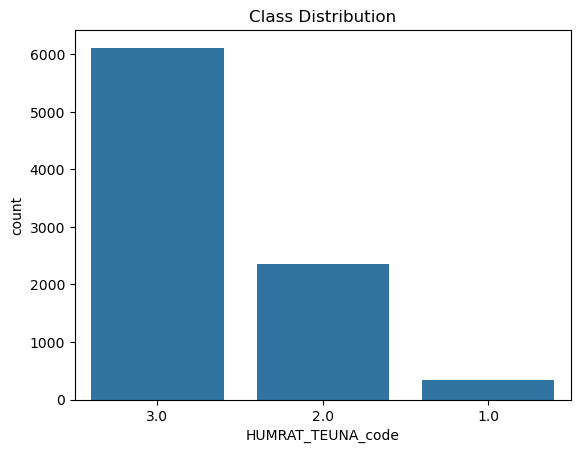

In [35]:
# Check class distribution
print(data['HUMRAT_TEUNA_code'].value_counts(normalize=True))

# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['HUMRAT_TEUNA_code'])
plt.title("Class Distribution")
plt.show()


#### 1 - קטלנית
#### 2 - קשה
#### 3 - קלה
#### Data is imbalanced! only 3 percent of data is קטלנית

# Feature Engineering

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
data

,HODESH_TEUNA_code,HUMRAT_TEUNA_code,MEHIRUT_MUTERET_code,ROHAV_code,SHAA_code,HAD_MASLUL_value,MEZEG_AVIR_value,PNE_KVISH_value,RAV_MASLUL_value,SIMUN_TIMRUR_value,SUG_DEREH_value,SUG_TEUNA_value,SUG_YOM_value,TEURA_value,THUM_GEOGRAFI_value,TKINUT_value,YEHIDA_value,YOM_BASHAVUA_value,YOM_LAYLA_value
0,4.0,3.0,1.0,3.0,37.0,דו סיטרי אין קו הפרדה רצוף,בהיר,יבש,אחר,אין ליקוי,עירוני לא בצומת,התנגשות חזית\nבאחור,חול המועד,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",ראשון,יום
1,5.0,2.0,1.0,2.0,81.0,חד סיטרי,לא ידוע,לא ידוע,אחר,אין ליקוי,עירוני לא בצומת,פגיעה בהולך רגל,יום אחר,לילה פעלה\nתאורה,ישראל ללא\nיהודה ושומרון,אין ליקוי,מרחב השרון,ראשון,לילה
2,7.0,2.0,0.0,0.0,67.0,לא ידוע מספר\nמסלולים,לא ידוע,לא ידוע,אחר,לא ידוע,עירוני לא בצומת,התנגשות חזית\nבאחור,יום אחר,יום לא ידוע,ישראל ללא\nיהודה ושומרון,לא ידוע,מרחב השפלה,רביעי,יום
3,1.0,2.0,2.0,2.0,50.0,דו סיטרי אין קו הפרדה רצוף,בהיר,יבש,אחר,אין ליקוי,לא עירוני בצומת,התנגשות חזית\nאל צד,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מרחב גליל,חמישי,יום
4,6.0,3.0,1.0,2.0,69.0,דו סיטרי אין קו הפרדה רצוף,בהיר,יבש,אחר,לא ידוע,עירוני לא בצומת,התנגשות חזית\nבאחור,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מחוז ירושלים,רביעי,יום
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,4.0,3.0,1.0,2.0,70.0,דו סיטרי אין קו הפרדה רצוף,בהיר,יבש,אחר,אין ליקוי,עירוני לא בצומת,התנגשות חזית\nאל צד,חול המועד,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,מחוז ירושלים,שבת,יום
8828,7.0,3.0,1.0,3.0,46.0,אחר,בהיר,יבש,מיפרדה בנויה ללא גדר בטיחות,אין ליקוי,עירוני לא בצומת,התנגשות חזית\nבאחור,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",רביעי,יום
8829,4.0,3.0,1.0,2.0,67.0,אחר,בהיר,יבש,מיפרדה עם גדר\nבטיחות,אין ליקוי,עירוני בצומת,פגיעה בהולך רגל,יום אחר,אור יום רגיל,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",רביעי,יום
8830,5.0,2.0,6.0,5.0,17.0,חד סיטרי,בהיר,יבש,אחר,אין ליקוי,לא עירוני לא\nבצומת,התנגשות עם עצם דומם,יום אחר,לילה פעלה\nתאורה,ישראל ללא\nיהודה ושומרון,אין ליקוי,"מרחב ת""א",שלישי,לילה


#### one hot encoding

In [37]:
# One-hot encoding
# Define the columns to exclude
exclude_columns = ['HUMRAT_TEUNA_code', 'MEHIRUT_MUTERET_code','ROHAV_code']
# Create a list of column names, excluding the specified columns
categorical_columns = [col for col in data.columns if col not in exclude_columns]

# Ensure the index is clean
data = data.reset_index(drop=True)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(data[categorical_columns])

# Convert the encoded array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Ensure the indices match
encoded_df = encoded_df.reset_index(drop=True)
data = data.drop(columns=categorical_columns).reset_index(drop=True)

# Concatenate the original and encoded data
data = pd.concat([data, encoded_df], axis=1)

# Verify the row counts
print(f"Rows before encoding: {8806}")  # Original rows
print(f"Rows after encoding: {data.shape[0]}")  # Final rows

Rows before encoding: 8806
Rows after encoding: 8806


In [38]:
data

,HUMRAT_TEUNA_code,MEHIRUT_MUTERET_code,ROHAV_code,HODESH_TEUNA_code_1.0,HODESH_TEUNA_code_10.0,HODESH_TEUNA_code_11.0,HODESH_TEUNA_code_12.0,HODESH_TEUNA_code_2.0,HODESH_TEUNA_code_3.0,HODESH_TEUNA_code_4.0,...,"YEHIDA_value_מרחב ת""א",YOM_BASHAVUA_value_חמישי,YOM_BASHAVUA_value_ראשון,YOM_BASHAVUA_value_רביעי,YOM_BASHAVUA_value_שבת,YOM_BASHAVUA_value_שישי,YOM_BASHAVUA_value_שלישי,YOM_BASHAVUA_value_שני,YOM_LAYLA_value_יום,YOM_LAYLA_value_לילה
0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8802,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8803,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8804,2.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


##### Removing meaningless new columns

In [39]:
unwanted_values = [ 'אחר', 'לא ידוע']
data = data.loc[:, ~data.columns.str.contains('|'.join(unwanted_values))]

In [40]:
data.columns

Index(['HUMRAT_TEUNA_code', 'MEHIRUT_MUTERET_code', 'ROHAV_code',
       'HODESH_TEUNA_code_1.0', 'HODESH_TEUNA_code_10.0',
       'HODESH_TEUNA_code_11.0', 'HODESH_TEUNA_code_12.0',
       'HODESH_TEUNA_code_2.0', 'HODESH_TEUNA_code_3.0',
       'HODESH_TEUNA_code_4.0',
       ...
       'YEHIDA_value_מרחב ת"א', 'YOM_BASHAVUA_value_חמישי',
       'YOM_BASHAVUA_value_ראשון', 'YOM_BASHAVUA_value_רביעי',
       'YOM_BASHAVUA_value_שבת', 'YOM_BASHAVUA_value_שישי',
       'YOM_BASHAVUA_value_שלישי', 'YOM_BASHAVUA_value_שני',
       'YOM_LAYLA_value_יום', 'YOM_LAYLA_value_לילה'],
      dtype='object', length=192)

##### Speed Limit column and road width is ordinal and not categorical, so we want them scaled

In [41]:
data['MEHIRUT_MUTERET_code']=data['MEHIRUT_MUTERET_code'].astype(float)
data['ROHAV_code']=data['ROHAV_code'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_24428\3529350967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code']=data['MEHIRUT_MUTERET_code'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_24428\3529350967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code']=data['ROHAV_code'].astype(float)


##### Replacing 0 which means unknown, with mean

In [42]:
mean_value = data['MEHIRUT_MUTERET_code'][data['MEHIRUT_MUTERET_code'] != 0.0].mean()
data['MEHIRUT_MUTERET_code'] = data['MEHIRUT_MUTERET_code'].replace(0.0,mean_value)
mean_value2 = data['ROHAV_code'][data['ROHAV_code'] != 0.0].mean()
data['ROHAV_code'] = data['ROHAV_code'].replace(0.0,mean_value2)

C:\Users\user\AppData\Local\Temp\ipykernel_24428\2076252829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code'] = data['MEHIRUT_MUTERET_code'].replace(0.0,mean_value)
C:\Users\user\AppData\Local\Temp\ipykernel_24428\2076252829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code'] = data['ROHAV_code'].replace(0.0,mean_value2)


In [43]:
minmax_scaler = MinMaxScaler()
data['MEHIRUT_MUTERET_code'] = minmax_scaler.fit_transform(data[['MEHIRUT_MUTERET_code']])
minmax_scaler2 = MinMaxScaler()
data['ROHAV_code'] = minmax_scaler2.fit_transform(data[['ROHAV_code']])

C:\Users\user\AppData\Local\Temp\ipykernel_24428\3119068104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEHIRUT_MUTERET_code'] = minmax_scaler.fit_transform(data[['MEHIRUT_MUTERET_code']])
C:\Users\user\AppData\Local\Temp\ipykernel_24428\3119068104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROHAV_code'] = minmax_scaler2.fit_transform(data[['ROHAV_code']])


## Model Training

#### Split x and y, make an encoded y version for models like XGBoost

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = data.drop(columns=['HUMRAT_TEUNA_code'])  # Drop target column
y = data['HUMRAT_TEUNA_code']                # Target column

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y
encoded_y = label_encoder.fit_transform(y)

#### Lots of columns, let's try PCA

Explained Variance Ratio: [0.02319599 0.01908372 0.01826805 0.01361971 0.01176477 0.010386
 0.00878042 0.00832921 0.00811043 0.00797948 0.00764479 0.0072426
 0.00722373 0.00706127 0.00705427 0.00689981 0.00679724 0.00676659
 0.00672302 0.00667808 0.00661214 0.0065687  0.00653197 0.00649477
 0.00648056 0.00644688 0.00637859 0.00634033 0.00631055 0.00625182
 0.00620641 0.00618219 0.00617138 0.00613243 0.00608892 0.00603521
 0.00602796 0.00600695 0.00596941 0.00596208 0.00593521 0.0058953
 0.00587171 0.00585071 0.00584183 0.00583377 0.00578787 0.00576735
 0.00574022 0.00573052 0.00570992 0.00569961 0.0056752  0.00565466
 0.00563917 0.00562737 0.00557785 0.00557376 0.00557058 0.00554777
 0.00552134 0.00552043 0.00549977 0.00547129 0.00546212 0.00543922
 0.00543204 0.00539942 0.0053866  0.00537363 0.00536378 0.00535947
 0.0053447  0.0053394  0.00533351 0.00532438 0.00532195 0.0053167
 0.00531296 0.00531031 0.00530929 0.00530692 0.00530536 0.00530459
 0.00530108 0.00529675 0.00529461 0.00529

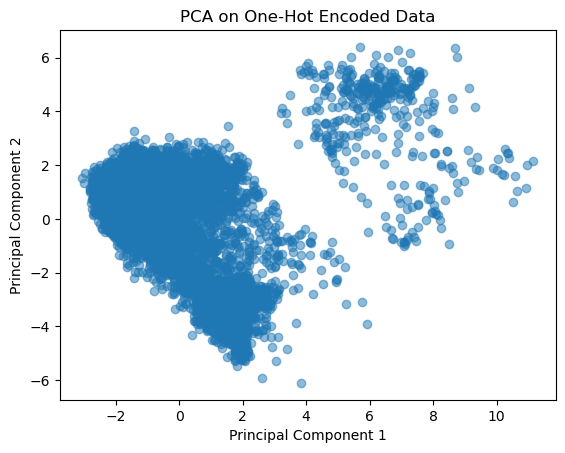

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=0.98)  # Retain 95% of the variance
principal_components = pca.fit_transform(data_scaled)

# Step 3: Create a DataFrame for the principal components
pca_df = pd.DataFrame(
    principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)

# Step 4: Analyze explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", np.cumsum(explained_variance))

# Optional: View the reduced data
print("PCA DataFrame:")
print(pca_df.head())

# Visualization (optional)
import matplotlib.pyplot as plt

# Scatter plot for the first two principal components
plt.scatter(pca_df['PC2'], pca_df['PC3'], alpha=0.5)
plt.title('PCA on One-Hot Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Random Forest with pca

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    pca_df, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       334
         2.0       0.74      0.34      0.47      2356
         3.0       0.76      0.96      0.85      6116

    accuracy                           0.76      8806
   macro avg       0.50      0.43      0.44      8806
weighted avg       0.73      0.76      0.71      8806



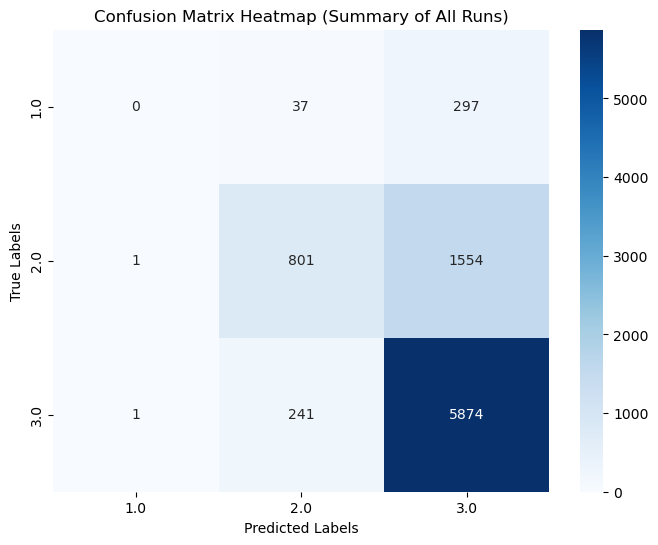

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(clf, pca_df, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### precision and recall of קטלנית down to 0, probably because קטלנית is only 3% of data, PCA removed it

#### Random Forest without pca

In [48]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.20      0.00      0.01       334
         2.0       0.76      0.36      0.49      2356
         3.0       0.77      0.96      0.85      6116

    accuracy                           0.77      8806
   macro avg       0.58      0.44      0.45      8806
weighted avg       0.74      0.77      0.72      8806



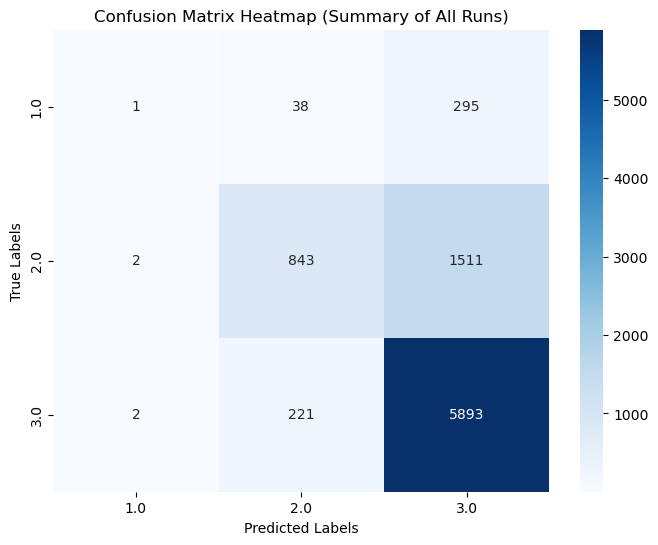

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(clf, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### high precision of קטלנית and recall close to 0, rarely classifying as קטלנית

#### Let's look at Precision - Recall graph

###### For imbalanced datasets, the Precision-Recall (PR) curve is better than the ROC curve because it focuses on the minority class by measuring precision (true positive predictions) and recall (true positive detection rate), ignoring the majority class's True Negatives (TNs). In contrast, the ROC curve can be misleadingly optimistic in imbalanced settings since it includes TNs, which dominate the false positive rate and inflate performance metrics. The PR curve directly evaluates the model's ability to identify and correctly classify the minority class, making it more relevant in such scenarios.

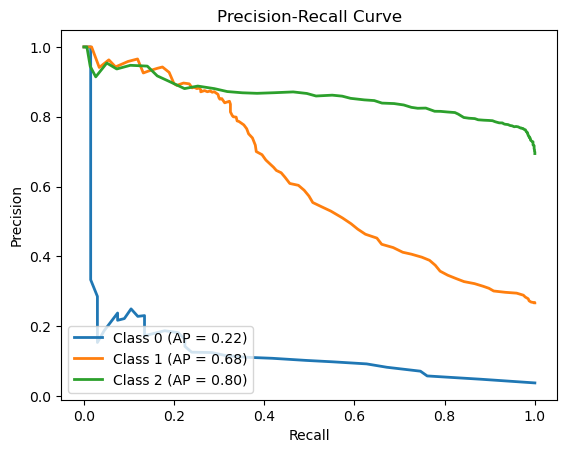

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Get the predicted probabilities for each class
y_prob = clf.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
thresholds = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class



# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### Resampling to fix imbalance

#### Random Forest with "class weights"

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# חלוקה לסט אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# יצירת מודל Random Forest עם המשקלות המותאמים
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.33      0.01      0.02       334
         2.0       0.78      0.35      0.48      2356
         3.0       0.76      0.96      0.85      6116

    accuracy                           0.76      8806
   macro avg       0.62      0.44      0.45      8806
weighted avg       0.75      0.76      0.72      8806



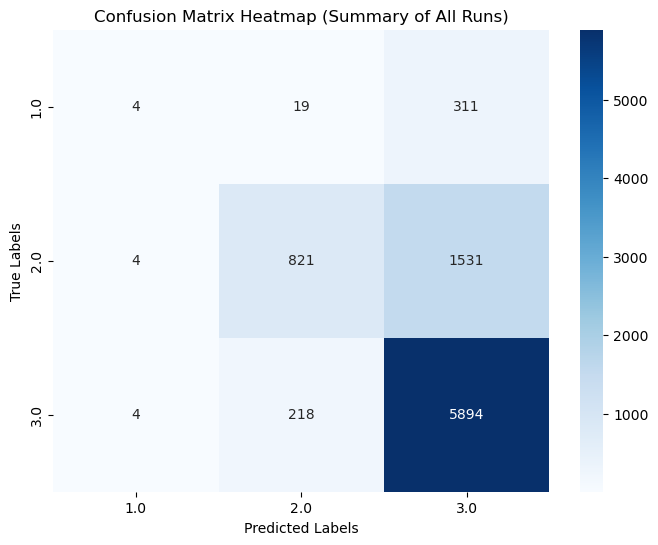

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

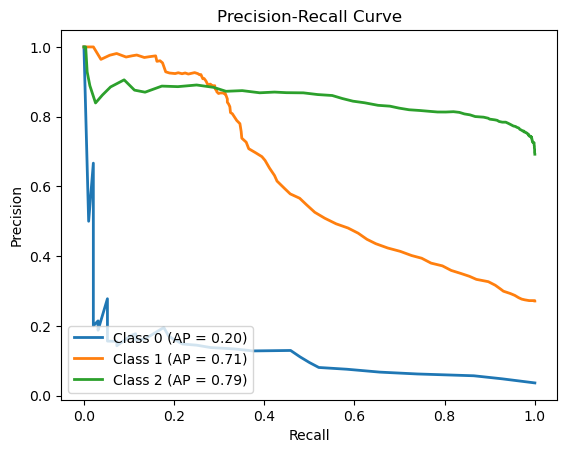

In [53]:
# 1. Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
thresholds = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class



# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### Oversampling using SMOTE

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd



# Step 2: Oversampling for "קטלנית"
smote = SMOTE(sampling_strategy={'1.0': int(y_train.value_counts()['3.0'] * 0.4)}, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_resampled, y_resampled = X_smote, y_smote

# Step 4: Print the new class distribution
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

# Step 5: Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)


Class distribution after resampling:
HUMRAT_TEUNA_code
3.0    4287
1.0    1714
2.0    1639
Name: count, dtype: int64


RandomForestClassifier(random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.20      0.00      0.01       334
         2.0       0.76      0.36      0.49      2356
         3.0       0.77      0.96      0.85      6116

    accuracy                           0.77      8806
   macro avg       0.58      0.44      0.45      8806
weighted avg       0.74      0.77      0.72      8806



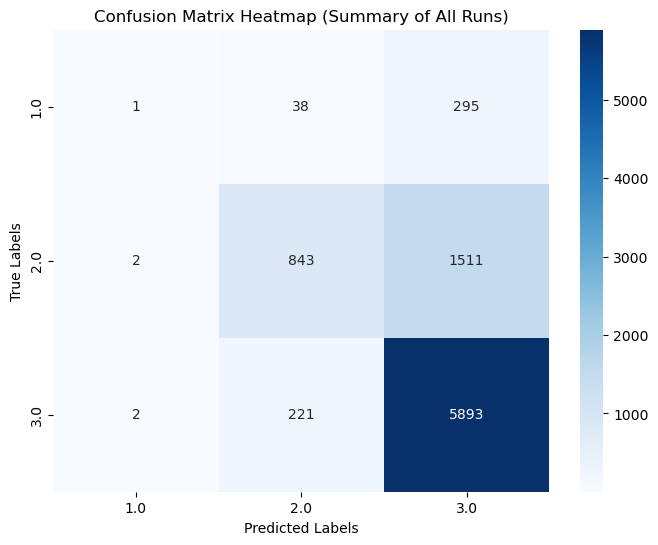

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Let's look at Precision Recall Graph

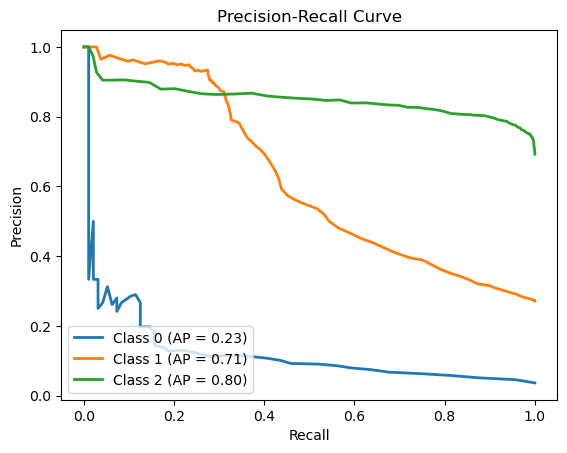

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
thresholds = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class


# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')


# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


##### plot ROC Curve

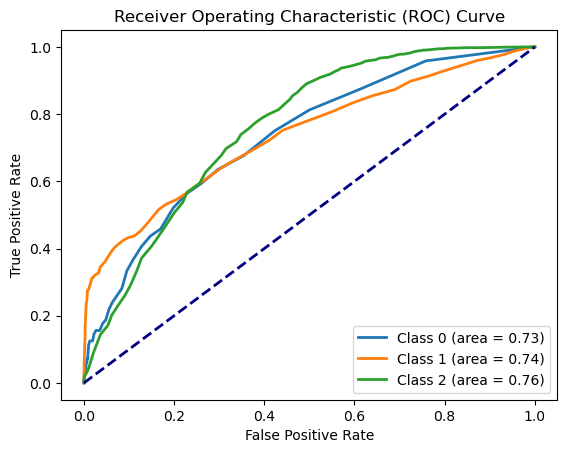

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming 'model' is your trained model and 'X_test' and 'y_test' are your test data
# 1. Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# 2. Binarize the true labels (if it's a multi-class problem)
# In multi-class classification, you need to convert the target into a one-hot encoded form
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot the ROC curve for each class
plt.figure()

# Plot all ROC curves
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [58]:
#!pip install xgboost

In [59]:
#!pip install lightgbm

#### k-nn

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# הגדרת מודל KNN
k = 5  # מספר השכנים הקרובים
knn = KNeighborsClassifier(n_neighbors=k)

# אימון המודל
knn.fit(X_train, y_train)



KNeighborsClassifier()

#### 5-fold cross evaluation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.11      0.03      0.05       334
         2.0       0.58      0.40      0.47      2356
         3.0       0.77      0.89      0.83      6116

    accuracy                           0.73      8806
   macro avg       0.49      0.44      0.45      8806
weighted avg       0.69      0.73      0.70      8806



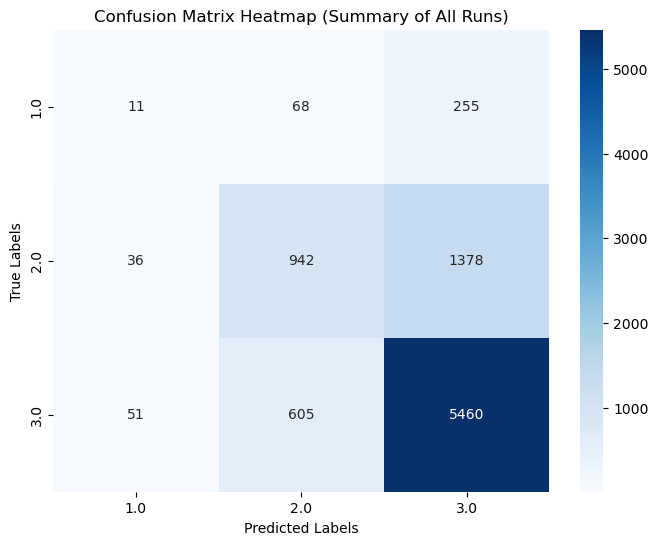

In [61]:
# Perform cross-validation predictions
y_pred = cross_val_predict(knn, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### SVM+class weights

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, stratify=y)


# Train an SVM with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)



SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.08      0.51      0.14       334
         2.0       0.59      0.45      0.51      2356
         3.0       0.84      0.68      0.75      6116

    accuracy                           0.61      8806
   macro avg       0.50      0.54      0.47      8806
weighted avg       0.74      0.61      0.66      8806



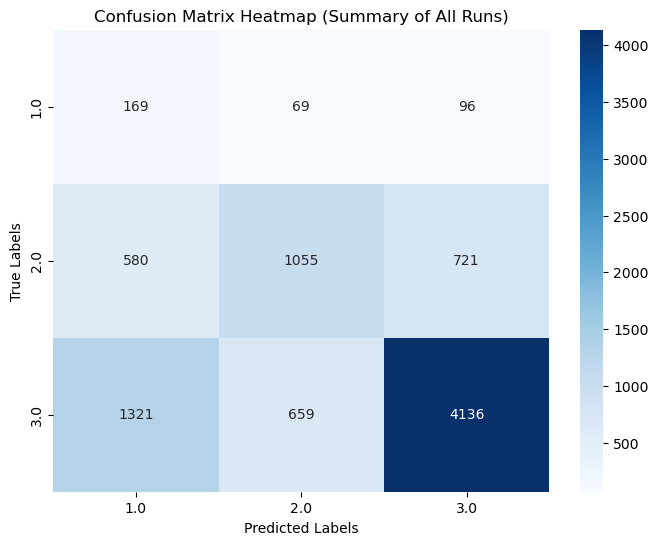

In [63]:
# Perform cross-validation predictions
y_pred = cross_val_predict(svm_model, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

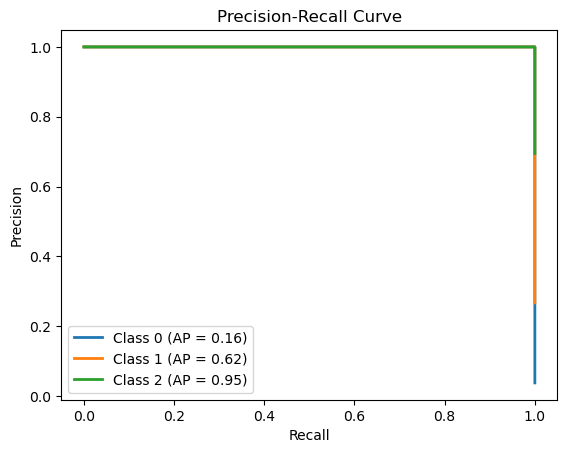

In [64]:
# 1. Get the predicted probabilities for each class
y_prob = svm_model.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
thresholds = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class


# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')


# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


##### Only model that gave a high Recall for קטלנית, but Precision and overall Accuracy not good

#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a Logistic Regression model
# The "multi_class" parameter specifies the multi-class strategy
logreg = LogisticRegression(
    multi_class='multinomial',  # Uses the softmax function for multi-class classification
    solver='lbfgs',             # A robust solver for multi-class classification
    max_iter=1000,              # Increase iterations for better convergence
    random_state=42
)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

         1.0       0.33      0.05      0.08       334
         2.0       0.68      0.40      0.50      2356
         3.0       0.78      0.93      0.85      6116

    accuracy                           0.76      8806
   macro avg       0.60      0.46      0.48      8806
weighted avg       0.73      0.76      0.73      8806



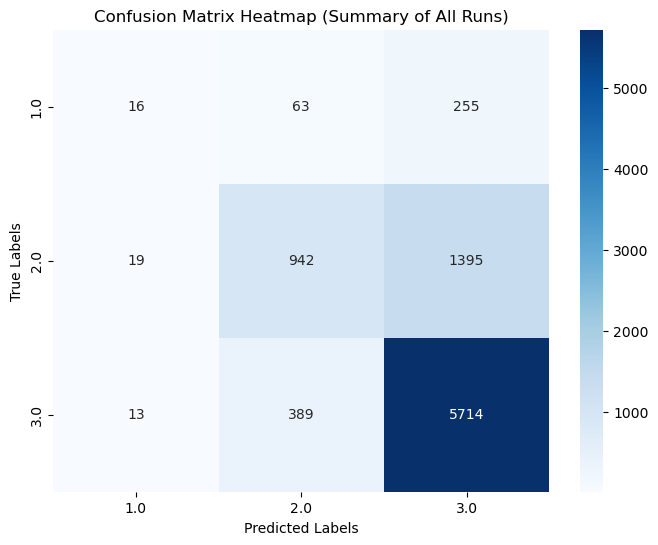

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(logreg, X, y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [67]:
# Extract feature importance (coefficients)
coefficients = logreg.coef_  # Coefficients for each class
feature_names = X.columns    # Get feature names

# Summarize feature importance
importance_df = pd.DataFrame(
    np.abs(coefficients).mean(axis=0),  # Average importance across all classes
    index=feature_names, 
    columns=['Importance']
).sort_values(by='Importance', ascending=False)

# Display most important features
importance_df.head(20)

,Importance
SUG_TEUNA_value_נפילה ברכב נע,1.115640
TEURA_value_לילה תאורה לא תקינה עם ראות\nמוגבלת,0.765671
PNE_KVISH_value_חול או חצץ על\nהכביש,0.699686
PNE_KVISH_value_מכוסה בבוץ,0.686162
SUG_TEUNA_value_התנגשות חזית\nאל צד,0.637282
SUG_TEUNA_value_התנגשות עם בעל חיים,0.632270
SHAA_code_11.0,0.631141
SIMUN_TIMRUR_value_סימון לקוי/חסר,0.606227
SHAA_code_17.0,0.595377
SHAA_code_94.0,0.553915


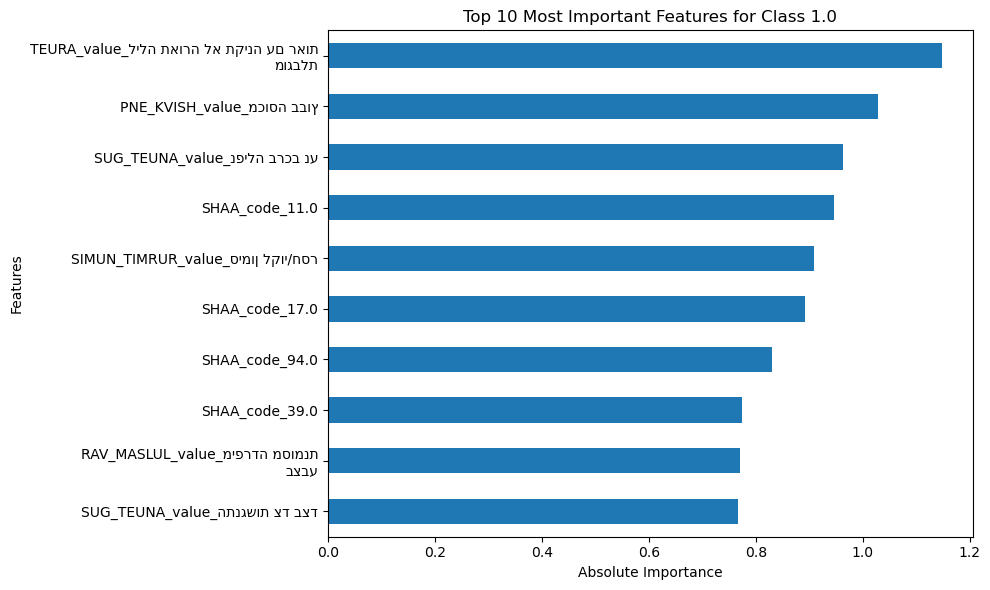

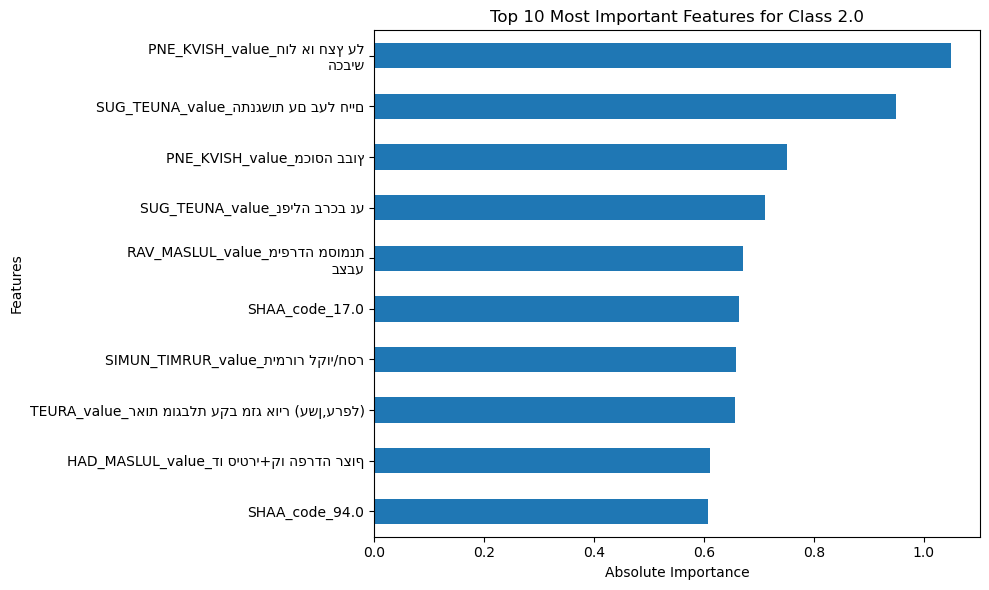

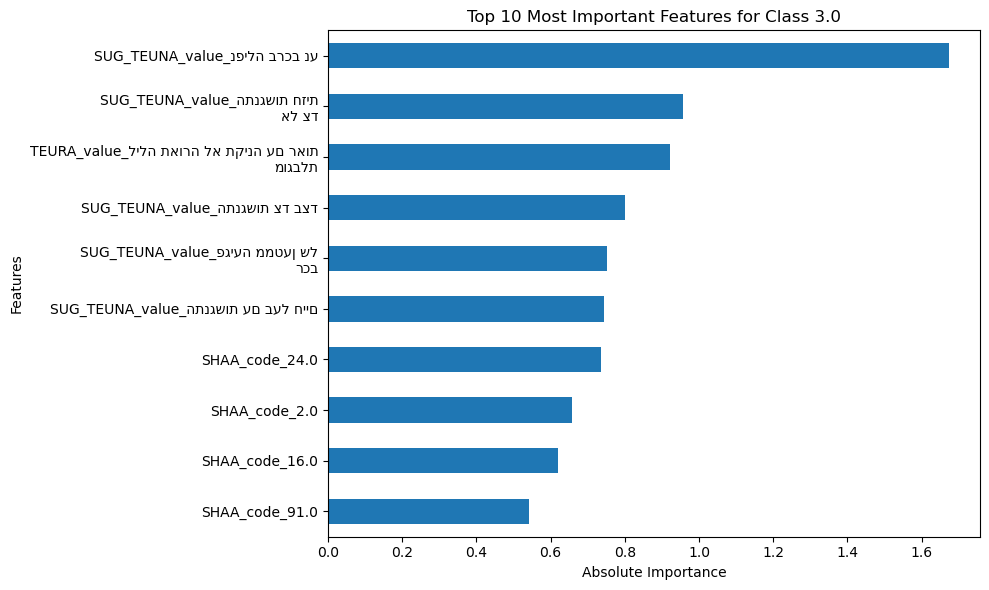

In [68]:
# Extract coefficients for each class
coefficients = logreg.coef_  # Shape: (n_classes, n_features)
classes = logreg.classes_    # Get the class labels
feature_names = X.columns    # Feature names

# Create a DataFrame for feature importance by class
importance_df = pd.DataFrame(coefficients.T,  # Transpose for feature-wise rows
                             index=feature_names, 
                             columns=[f"Class_{cls}" for cls in classes])

# Plot top 10 features for each class
for cls in classes:
    sorted_importance = importance_df[f"Class_{cls}"].abs().sort_values(ascending=False)  # Sort by absolute importance
    top_10_features = sorted_importance.head(10)
    
    # Plot
    plt.figure(figsize=(10, 6))
    top_10_features.plot(kind='barh')
    plt.title(f"Top 10 Most Important Features for Class {cls}")
    plt.xlabel("Absolute Importance")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.tight_layout()
    plt.show()

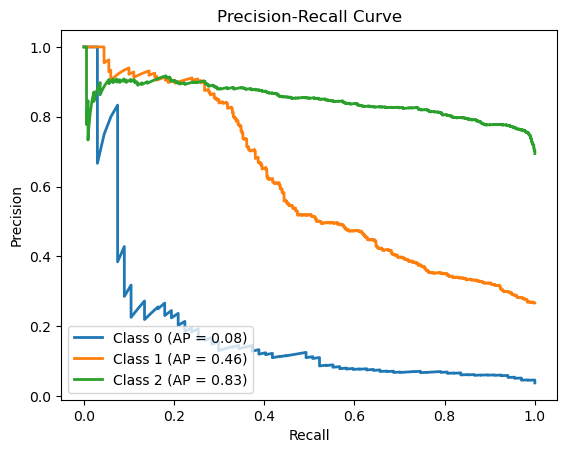

In [69]:
# 1. Get the predicted probabilities for each class
y_prob = logreg.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=['1.0', '2.0', '3.0'])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
thresholds = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class



# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#### XGBoost

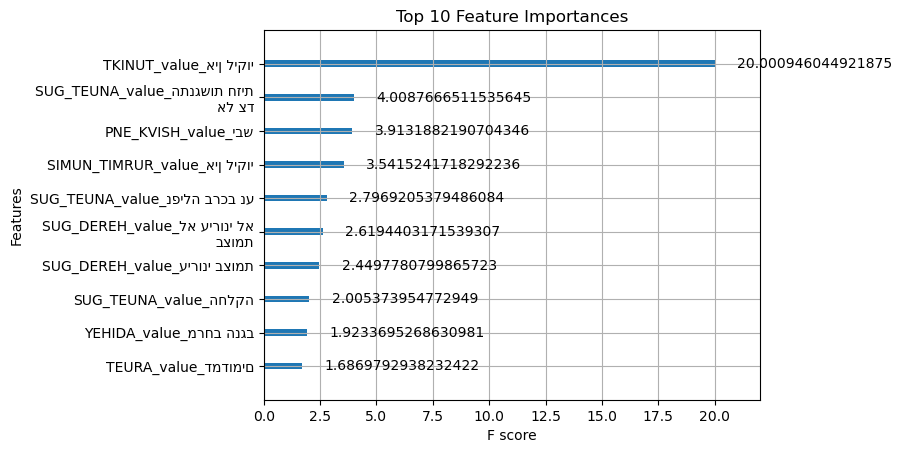

In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
X = data.drop(columns=['HUMRAT_TEUNA_code'])  # Drop the target column
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_y, test_size=0.2, random_state=42, stratify=encoded_y
)

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',        # For multi-class classification
    num_class=3,                      # Number of classes
    eval_metric='mlogloss',           # Log loss for multi-class problems
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Feature Importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()

#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

           0       0.29      0.05      0.08       334
           1       0.67      0.42      0.51      2356
           2       0.78      0.93      0.85      6116

    accuracy                           0.76      8806
   macro avg       0.58      0.47      0.48      8806
weighted avg       0.73      0.76      0.73      8806



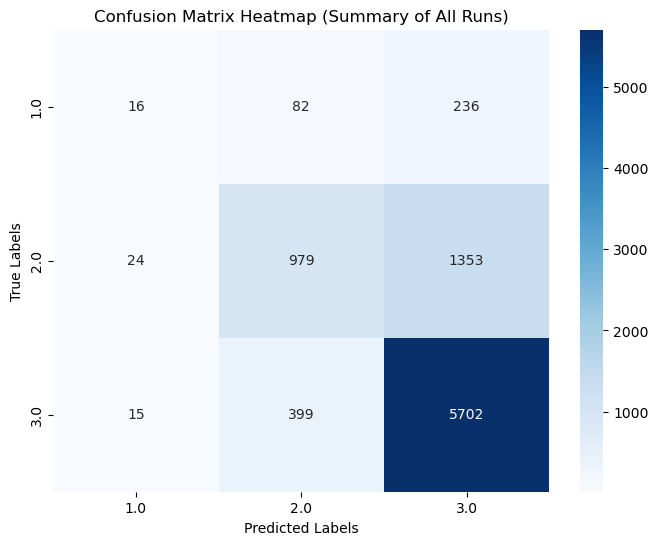

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(xgb_model, X, encoded_y, cv=5)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(encoded_y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(encoded_y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

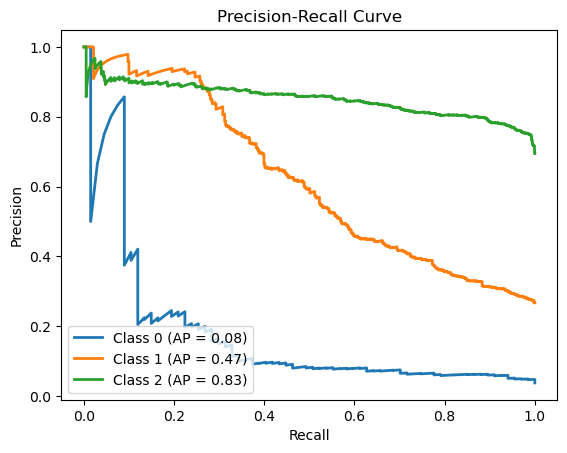

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Get the predicted probabilities for each class
y_prob = xgb_model.predict_proba(X_test)

# 2. Binarize the true labels (one-hot encoding for multi-class classification)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes based on your target

# 3. Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# 4. Compute the precision-recall curve for each class
for i in range(y_test_bin.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = np.mean(precision[i])  # Mean precision score for the class

# 5. Plot the Precision-Recall curve for each class
plt.figure()

# Plot precision-recall curves for each class
for i in range(y_test_bin.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


#### Until now we see that ROC Curve is pretty much the same in all models, but becuse our data is imbalanced we can't look at AUC as the evaluation metric, we have to look at Precision-Recall tradeoff. XGBoost had best Precision - Recall, with 50% Precision 10% Recall for קטלנית.

#### XGBoost + Class Weights

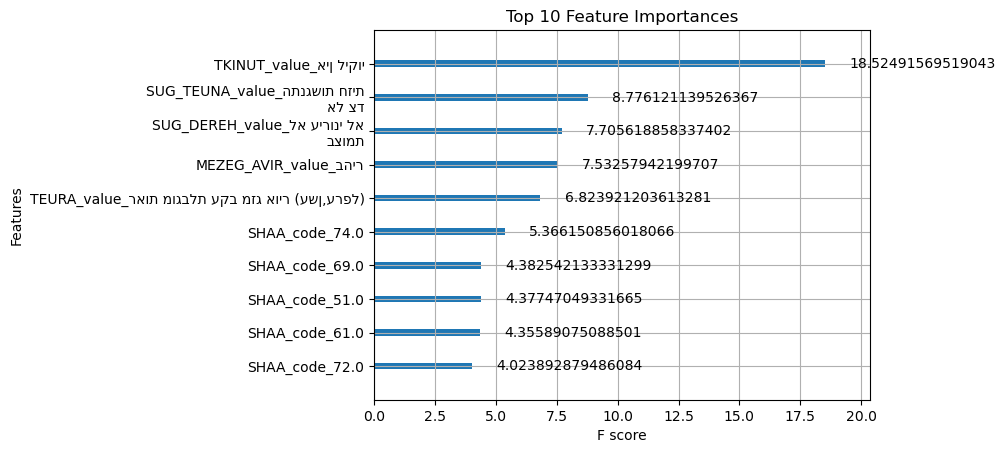

In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into train and test sets
X = data.drop(columns=['HUMRAT_TEUNA_code'])  # Drop the target column
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_y, test_size=0.2, random_state=42, stratify=encoded_y
)

# Calculate class weights to address imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(encoded_y),
    y=encoded_y
)

# Map class weights to training samples
sample_weights = np.array([class_weights[class_idx] for class_idx in y_train])

# Train XGBoost Classifier with sample weights
xgb_model1 = xgb.XGBClassifier(
    objective='multi:softprob',        # For multi-class classification
    num_class=3,                      # Number of classes
    eval_metric='mlogloss',           # Log loss for multi-class problems
    random_state=42
)

# Fit the model with sample weights
xgb_model1.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions
y_pred = xgb_model1.predict(X_test)



# Feature Importance
xgb.plot_importance(xgb_model1, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()


#### Evaluation using 5-fold validation

Classification Report (Summary of All Runs):
              precision    recall  f1-score   support

           0       0.22      0.04      0.07       334
           1       0.68      0.41      0.51      2356
           2       0.78      0.94      0.85      6116

    accuracy                           0.76      8806
   macro avg       0.56      0.46      0.48      8806
weighted avg       0.73      0.76      0.73      8806



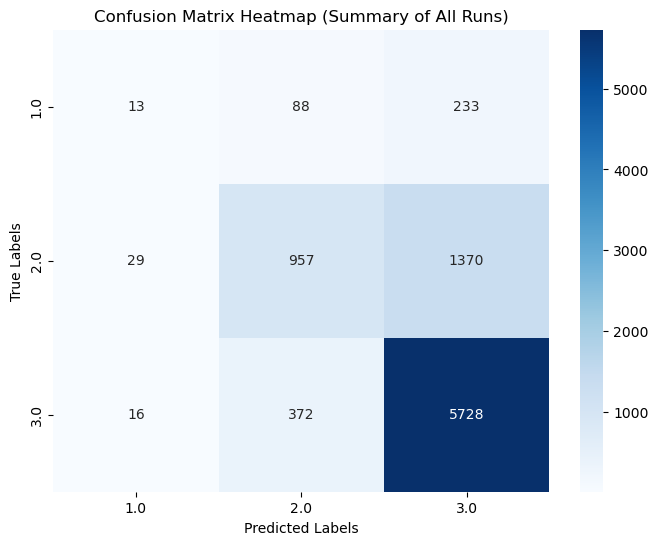

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(xgb_model1, X, encoded_y, cv=10)

# Generate classification report
print("Classification Report (Summary of All Runs):")
report = classification_report(encoded_y, y_pred, digits=2)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(encoded_y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix Heatmap (Summary of All Runs)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### XGBoost was better without class weights

### Hyperparameter tuning

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.68725156161272
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.33      0.17        67
           1       0.55      0.50      0.53       471
           2       0.82      0.76      0.79      1224

    accuracy                           0.68      1762
   macro avg       0.50      0.53      0.49      1762
weighted avg       0.72      0.68      0.70      1762

Confusion Matrix:
 [[ 22  15  30]
 [ 62 236 173]
 [113 176 935]]


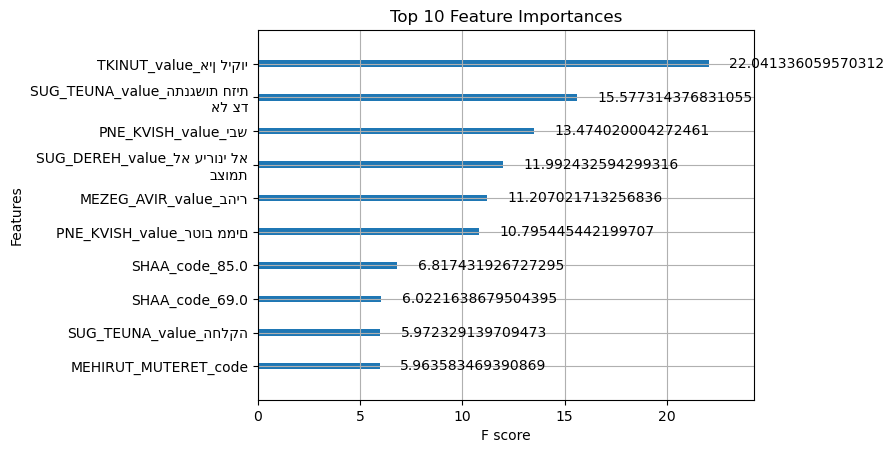

In [75]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Split the data into train and test sets
X = data.drop(columns=['HUMRAT_TEUNA_code'])  # Drop the target column
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_y, test_size=0.2, random_state=42, stratify=encoded_y
)

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to [0, 1, 2]
y_test_encoded = label_encoder.transform(y_test)

# Calculate class weights to address imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

# Map class weights to training samples
sample_weights = np.array([class_weights[class_idx] for class_idx in y_train_encoded])

# Define the base XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',        # For multi-class classification
    num_class=3,                      # Number of classes
    eval_metric='mlogloss',           # Log loss for multi-class problems
    random_state=42
)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5,],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100,]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',              # You can use 'roc_auc_ovo' or other metrics for multi-class problems
    cv=3,                            # 3-fold cross-validation
    verbose=2,                       # Print progress
    n_jobs=-1                        # Use all available CPU cores
)

# Perform GridSearchCV with encoded labels
grid_search.fit(X_train, y_train_encoded, sample_weight=sample_weights)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Train the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Decode the predicted labels back to the original format (optional)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the tuned model
print("Classification Report:\n", classification_report(y_test, y_pred_decoded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decoded))

# Feature Importance Plot
xgb.plot_importance(best_xgb_model, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()


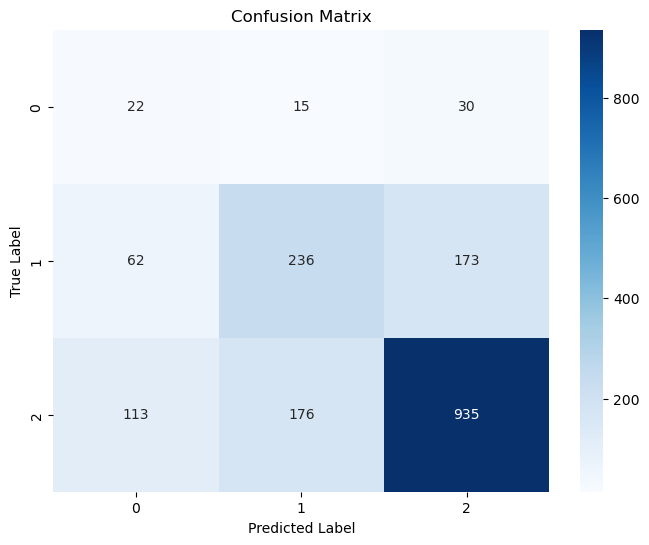

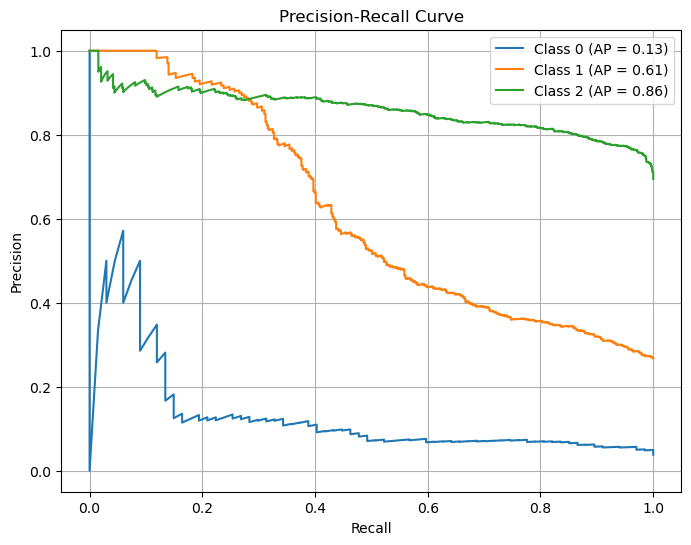

In [76]:
# Add the missing import at the top of your script
from sklearn.metrics import average_precision_score

# Rest of the code remains the same
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# Get predictions and probabilities from the best model
y_pred = grid_search.best_estimator_.predict(X_test)
y_prob = grid_search.best_estimator_.predict_proba(X_test)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Precision-Recall Curve
plt.figure(figsize=(8, 6))

# Compute Precision-Recall for each class
for i in range(len(np.unique(y_test))):
    precision, recall, _ = precision_recall_curve((y_test == i).astype(int), y_prob[:, i])
    avg_precision = average_precision_score((y_test == i).astype(int), y_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

# Customize the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best F1-Weighted Score: 0.731233893433655
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.07      0.12        67
           1       0.69      0.39      0.50       471
           2       0.78      0.94      0.85      1224

    accuracy                           0.76      1762
   macro avg       0.62      0.47      0.49      1762
weighted avg       0.74      0.76      0.73      1762

Confusion Matrix:
 [[   5   14   48]
 [   2  186  283]
 [   6   71 1147]]


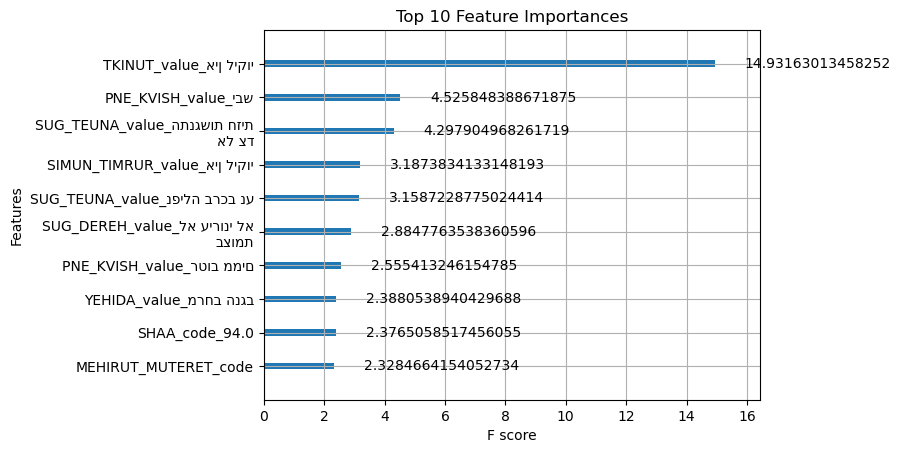

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),  # Number of classes
    eval_metric='mlogloss',
    random_state=42
)

# Define a custom scoring metric for GridSearchCV
scorer = make_scorer(f1_score, average='weighted')  # Weighted F1-score for multi-class problems

# Initialize GridSearchCV with the custom scoring metric
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,  # Use F1-weighted as the scoring metric
    cv=3,            # 3-fold cross-validation
    verbose=1,
    n_jobs=-1        # Use all available CPU cores
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Weighted Score:", grid_search.best_score_)
# Train the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_model.predict(X_test)

# Decode the predicted labels back to the original format (optional)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the tuned model
print("Classification Report:\n", classification_report(y_test, y_pred_decoded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decoded))

# Feature Importance Plot
xgb.plot_importance(best_xgb_model, max_num_features=10, importance_type='gain', title='Top 10 Feature Importances')
plt.show()


# Part 2 - Unsupervised Learning

### Looking for Clusters in the data

In [78]:
data2=data
data2

,HUMRAT_TEUNA_code,MEHIRUT_MUTERET_code,ROHAV_code,HODESH_TEUNA_code_1.0,HODESH_TEUNA_code_10.0,HODESH_TEUNA_code_11.0,HODESH_TEUNA_code_12.0,HODESH_TEUNA_code_2.0,HODESH_TEUNA_code_3.0,HODESH_TEUNA_code_4.0,...,"YEHIDA_value_מרחב ת""א",YOM_BASHAVUA_value_חמישי,YOM_BASHAVUA_value_ראשון,YOM_BASHAVUA_value_רביעי,YOM_BASHAVUA_value_שבת,YOM_BASHAVUA_value_שישי,YOM_BASHAVUA_value_שלישי,YOM_BASHAVUA_value_שני,YOM_LAYLA_value_יום,YOM_LAYLA_value_לילה
0,3.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.165982,0.483583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.142857,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,3.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8802,3.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8803,3.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8804,2.0,0.714286,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
scaler = MinMaxScaler()
# Step 2: Fit and transform the data
scaled_array = scaler.fit_transform(data2)

# Step 3: Convert the scaled array back to a DataFrame
data2 = pd.DataFrame(scaled_array, columns=data2.columns, index=data2.index)


In [80]:
data2


,HUMRAT_TEUNA_code,MEHIRUT_MUTERET_code,ROHAV_code,HODESH_TEUNA_code_1.0,HODESH_TEUNA_code_10.0,HODESH_TEUNA_code_11.0,HODESH_TEUNA_code_12.0,HODESH_TEUNA_code_2.0,HODESH_TEUNA_code_3.0,HODESH_TEUNA_code_4.0,...,"YEHIDA_value_מרחב ת""א",YOM_BASHAVUA_value_חמישי,YOM_BASHAVUA_value_ראשון,YOM_BASHAVUA_value_רביעי,YOM_BASHAVUA_value_שבת,YOM_BASHAVUA_value_שישי,YOM_BASHAVUA_value_שלישי,YOM_BASHAVUA_value_שני,YOM_LAYLA_value_יום,YOM_LAYLA_value_לילה
0,1.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.5,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.165982,0.483583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.5,0.142857,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,1.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8802,1.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8803,1.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8804,0.5,0.714286,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Let's look for interesting correllations

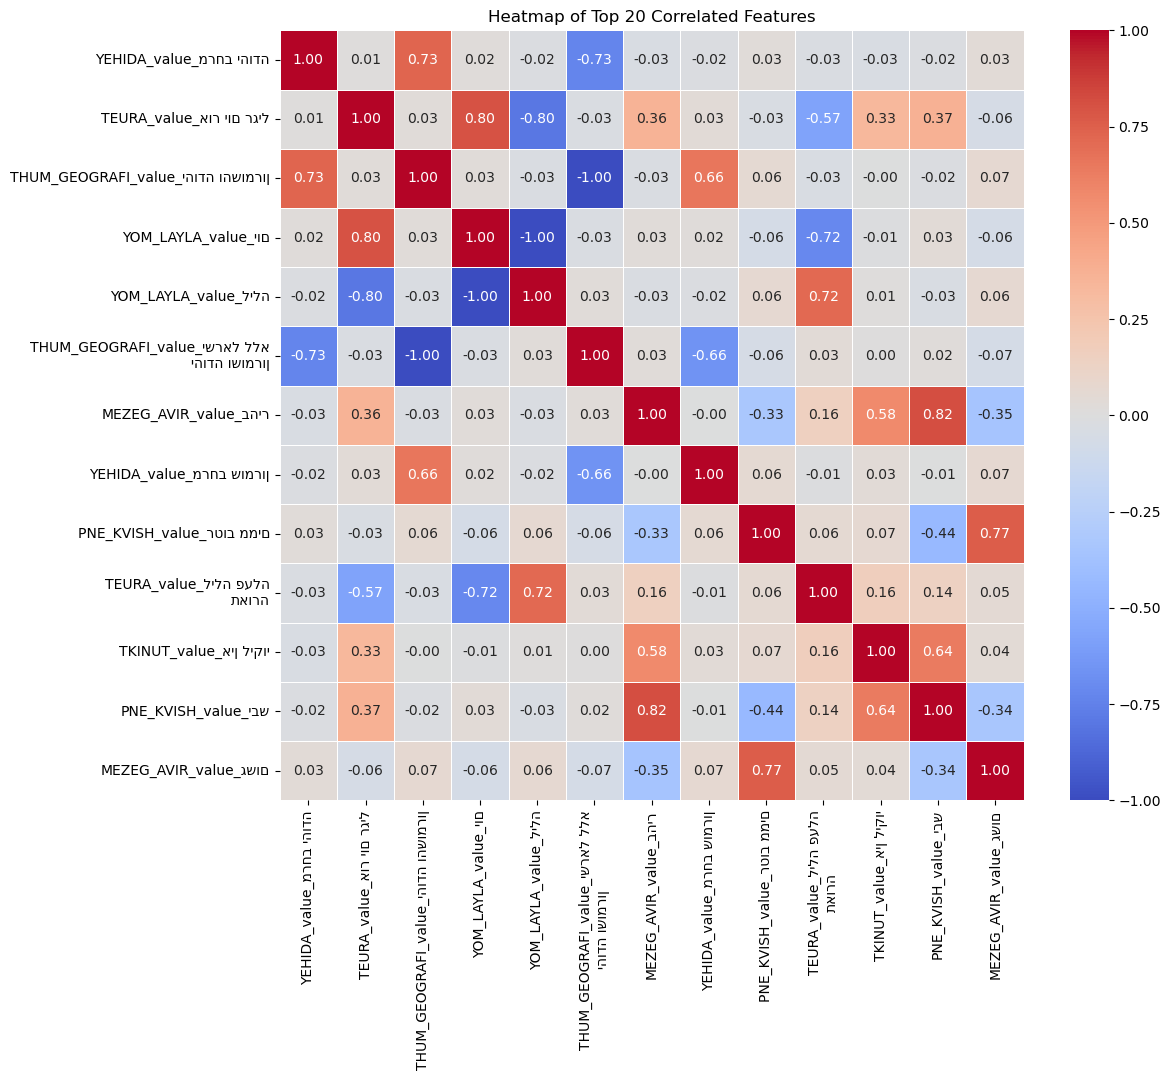

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# חישוב מטריצת הקורלציה
correlation_matrix = data2.corr()

# מציאת הקורלציות הגבוהות ביותר (מתעלמים מהאלכסון)
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# שמירת 20 הקורלציות הגבוהות ביותר (ללא שכפולים)
top_corr_features = sorted_corr_pairs[sorted_corr_pairs != 1].head(30)

# קבלת רשימת הפיצ'רים
top_features = list(set(top_corr_features.index.get_level_values(0)).union(
    top_corr_features.index.get_level_values(1)
))

# סינון מטריצת הקורלציה ל-20 הפיצ'רים הרלוונטיים
filtered_corr_matrix = correlation_matrix.loc[top_features, top_features]

# יצירת Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Top 20 Correlated Features")
plt.show()


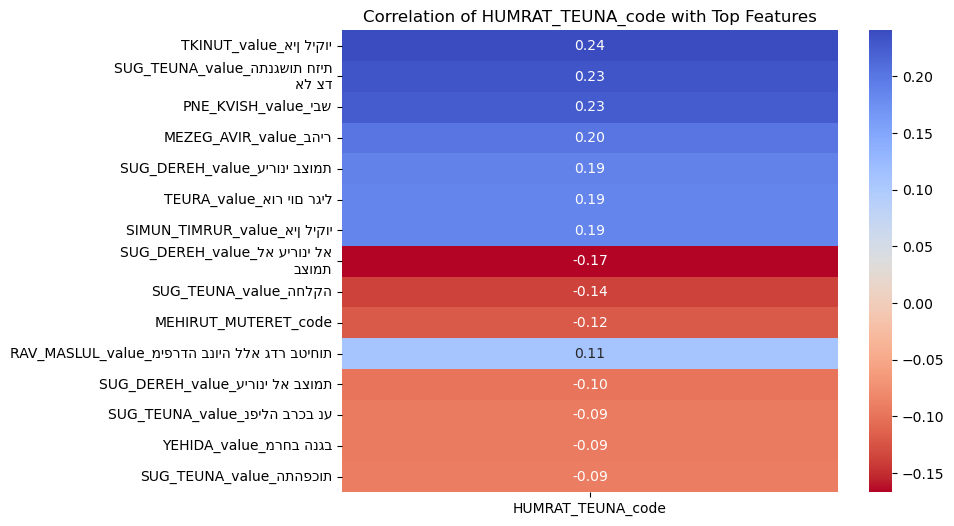

In [82]:


# חישוב הקורלציה של הפיצ'ר עם כל שאר הפיצ'רים
feature_correlations = data.corr()['HUMRAT_TEUNA_code'].sort_values(key=abs, ascending=False)

# הצגת 10 הפיצ'רים עם הקורלציה הגבוהה ביותר (לא כולל את הפיצ'ר עצמו)
top_feature_corr = feature_correlations.drop('HUMRAT_TEUNA_code').head(15)

# יצירת Heatmap עבור הפיצ'רים שנבחרו
plt.figure(figsize=(8, 6))
sns.heatmap(top_feature_corr.to_frame(), annot=True, cmap='coolwarm_r', fmt=".2f", cbar=True)
plt.title(f"Correlation of {'HUMRAT_TEUNA_code'} with Top Features")
plt.show()

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# קריאת הנתונים שלך (תן כאן את הנתונים שלך ממקור מתאים)
datadb = data2[['HUMRAT_TEUNA_code', 'MEHIRUT_MUTERET_code', 'YOM_LAYLA_value_יום']]

# הפעלת DBSCAN
db = DBSCAN(eps=0.5, min_samples=2)
labels = db.fit_predict(datadb)

# חישוב מדד סילואט
sil_score = silhouette_score(datadb, labels)
print(f"Silhouette Score: {sil_score}")

# הצגת הצברים שהתקבלו
print(f"Cluster Labels: {labels}")

Silhouette Score: 0.6436050470756839
Cluster Labels: [0 1 0 ... 0 1 0]


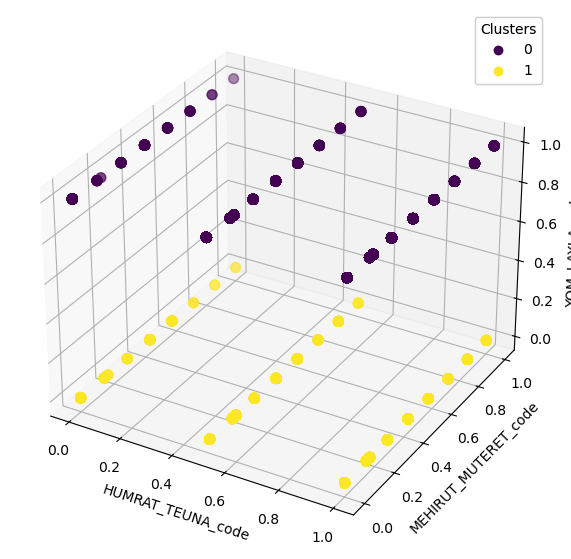

In [84]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# יצירת גרף תלת-מימדי
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# צבעים שונים לכל צבר
scatter = ax.scatter(datadb['HUMRAT_TEUNA_code'], datadb['MEHIRUT_MUTERET_code'], datadb['YOM_LAYLA_value_יום'], c=labels, cmap='viridis', s=50)

# הוספת צבעים לתיאור
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# הוספת כותרות לצירים
ax.set_xlabel('HUMRAT_TEUNA_code')
ax.set_ylabel('MEHIRUT_MUTERET_code')
ax.set_zlabel('YOM_LAYLA_value_יום')

# הצגת הגרף
plt.show()

#### Start with T-SNE

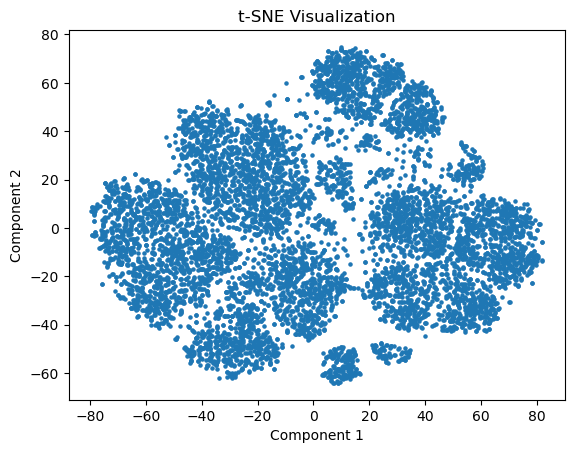

In [85]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# הפעלת t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data2)

# הצגת התוצאות בגרף
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=5)
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


##### We can identify a few clusters, let's try k-means

#### K-Means

###### How many clusters? lets check elbow method

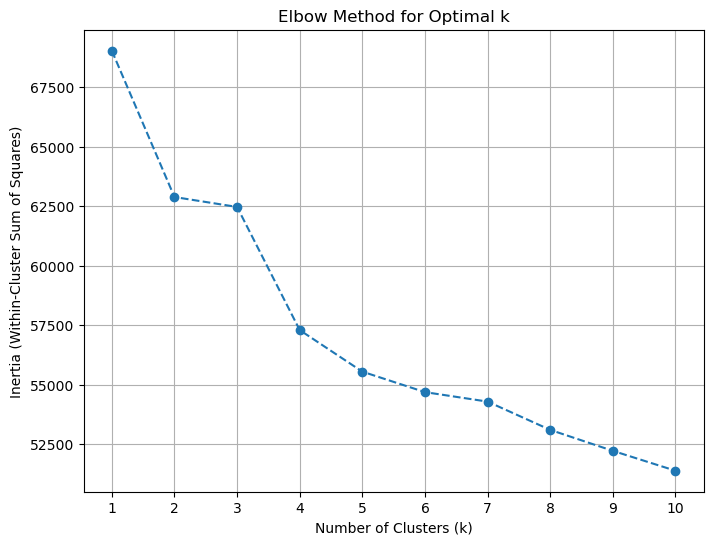

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# טווח של מספרי קלאסטרים לניתוח
k_values = range(1, 11)
inertias = []

# חישוב Inertia עבור כל ערך של k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

# ציור גרף Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_values)
plt.grid()
plt.show()

##### Looks like 5 should be the best

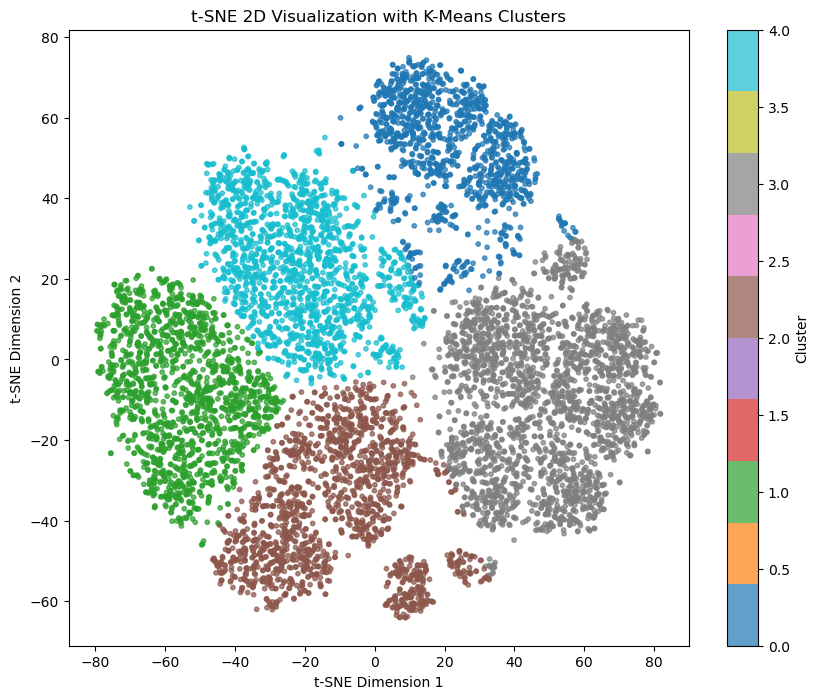

In [94]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters = 5 # שנה את מספר הקלאסטרים בהתאם לצורך
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_tsne)

# הוספת התוצאה לדאטה
data2['Cluster'] = clusters

# הדמיה דו-ממדית
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='tab10', s=10, alpha=0.7)
plt.title("t-SNE 2D Visualization with K-Means Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

In [95]:
# חישוב מדד סילואט
sil_score = silhouette_score(data_tsne, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4517880082130432


##### Lets try understanding the clusters by looking at features with highest variance across the clusters.

In [89]:
# Compute cluster-wise mean for each feature
cluster_means = data2.groupby('Cluster').mean()

# Identify features with the highest variance across clusters
feature_variances = cluster_means.var(axis=0).sort_values(ascending=False)
print("Top features with high variance across clusters:")
print(feature_variances.head(10))

Top features with high variance across clusters:
TEURA_value_אור יום רגיל           0.263391
YOM_LAYLA_value_לילה               0.183334
YOM_LAYLA_value_יום                0.183334
MEZEG_AVIR_value_בהיר              0.167629
PNE_KVISH_value_יבש                0.163588
SUG_DEREH_value_עירוני בצומת       0.159502
SUG_DEREH_value_עירוני לא בצומת    0.149924
TKINUT_value_אין ליקוי             0.124776
SIMUN_TIMRUR_value_אין ליקוי       0.113403
TEURA_value_לילה פעלה\nתאורה       0.101289
dtype: float64


In [90]:
# Compute cluster-wise mean for each feature
cluster_means = data2.groupby('Cluster').mean()

# Identify features with the highest variance across clusters
feature_variances = cluster_means.var(axis=0).sort_values(ascending=False)
top_high_variance_features = feature_variances.head(10).index

print("Top features with high variance across clusters:")
print(top_high_variance_features)

# Filter the cluster means to only include the top high-variance features
filtered_cluster_means = cluster_means[top_high_variance_features]

# Find the top 5 features for each cluster among the high-variance features
top_features_per_cluster = {}
for cluster in filtered_cluster_means.index:
    # Sort the selected features for the current cluster by their mean values
    sorted_features = filtered_cluster_means.loc[cluster].sort_values(ascending=False)
    # Select the top 5 features
    top_features = sorted_features.head(5)
    top_features_per_cluster[cluster] = top_features

# Display the result
for cluster, features in top_features_per_cluster.items():
    print(f"Cluster {cluster}:")
    print(features)
    print("\n")

Top features with high variance across clusters:
Index(['TEURA_value_אור יום רגיל', 'YOM_LAYLA_value_לילה',
       'YOM_LAYLA_value_יום', 'MEZEG_AVIR_value_בהיר', 'PNE_KVISH_value_יבש',
       'SUG_DEREH_value_עירוני בצומת', 'SUG_DEREH_value_עירוני לא בצומת',
       'TKINUT_value_אין ליקוי', 'SIMUN_TIMRUR_value_אין ליקוי',
       'TEURA_value_לילה פעלה\nתאורה'],
      dtype='object')
Cluster 0:
YOM_LAYLA_value_יום                0.635285
SUG_DEREH_value_עירוני לא בצומת    0.512658
YOM_LAYLA_value_לילה               0.364715
SUG_DEREH_value_עירוני בצומת       0.172468
TKINUT_value_אין ליקוי             0.154272
Name: 0, dtype: float64


Cluster 1:
YOM_LAYLA_value_יום             1.000000
PNE_KVISH_value_יבש             0.984403
TEURA_value_אור יום רגיל        0.977804
SUG_DEREH_value_עירוני בצומת    0.976005
MEZEG_AVIR_value_בהיר           0.963407
Name: 1, dtype: float64


Cluster 2:
PNE_KVISH_value_יבש         0.977791
TKINUT_value_אין ליקוי      0.954413
YOM_LAYLA_value_יום         0

#### Let's try without T-sne

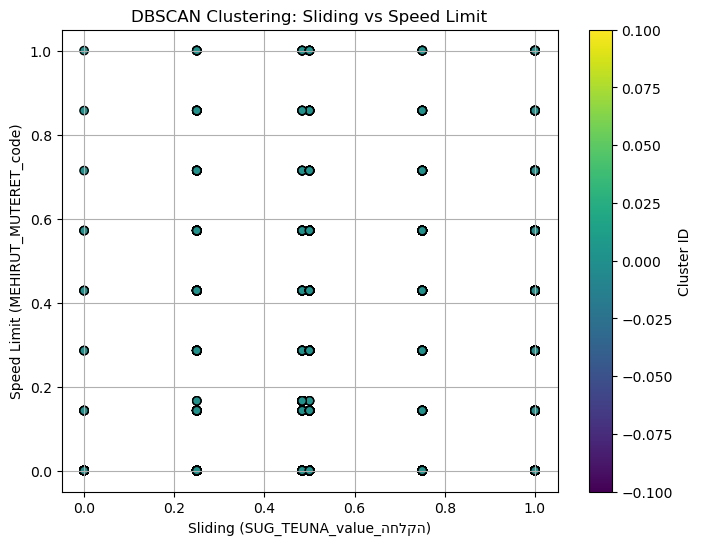

In [91]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# הנחת נתונים - data2
# נניח ש-"MEHIRUT_MUTERET_code" הוא משתנה המהירות המותרת
# ו-"SUG_TEUNA_value_החלקה" הוא משתנה החלקה
X = data2[['ROHAV_code', 'MEHIRUT_MUTERET_code']]  # בחר את שני המשתנים

# הפעלת DBSCAN עם פרמטרים מתאימים
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps הוא המרחק המקסימלי בין נקודות באותו קלאסטר, min_samples הוא מספר הנקודות המינימליות בקלאסטר
clusters = dbscan.fit_predict(X)

# ציור גרף דו-ממדי עם הצבעים השונים עבור כל קלאסטר
plt.figure(figsize=(8, 6))

# הצגת הקלאסטרים כנקודות צבעוניות
plt.scatter(X['ROHAV_code'], X['MEHIRUT_MUTERET_code'], c=clusters, cmap='viridis', marker='o', edgecolor='k')

# הוספת כותרות
plt.title("DBSCAN Clustering: Sliding vs Speed Limit")
plt.xlabel("Sliding (SUG_TEUNA_value_החלקה)")
plt.ylabel("Speed Limit (MEHIRUT_MUTERET_code)")
plt.grid(True)
plt.colorbar(label='Cluster ID')  # הצגת צבעים לכל קלאסטר
plt.show()